# **Business Problem Understanding**

## **Context**

Dalam era digital yang terus berkembang, industri e-commerce telah menjadi salah satu pilar utama dalam perekonomian global. Perusahaan e-commerce menyediakan platform yang memungkinkan pelanggan untuk melakukan pembelian secara online dengan kenyamanan dan kemudahan. Perkembangan industri e-commerce ini didukung oleh meningkatnya penggunaan internet dan penggunaan smartphone di masyarakat. Namun, di tengah perkembangan tersebut, perusahaan ecommerce juga menghadapi tantangan, salah satunya adalah masalah churn atau kehilangan pelanggan.

Churn adalah suatu fenomena di mana pelanggan berhenti menggunakan produk atau layanan ecommerce dalam jangka waktu tertentu. Biasanya disebabkan oleh berbagai alasan, seperti harga yang terlalu tinggi, kualitas produk atau layanan yang tidak memuaskan, pelayanan pelanggan yang buruk, persaingan yang ketat, atau perubahan kebutuhan pelanggan (sumber [klaviyo.com](https://www.klaviyo.com/blog/predicting-churn-risk-our-new-model#:~:text=Churn%20rate%20is%20the%20percentage,your%20business%20that%20need%20attention)). Oleh karena itu, Churn merupakan sebuah tantangan yang dihadapi oleh perusahaan dengan bisnis E-Commerce, karena dapat menyebabkan kehilangan pendapatan, peningkatan biaya untuk mendapatkan pelanggan baru, dan penurunan kepuasan pelanggan.

Penanganan yang efektif terhadap churn menjadi suatu kebutuhan mendesak bagi perusahaan. Perusahaan E-Commerce harus memahami faktor-faktor apa saja yang mempengaruhi pelanggan untuk churn. Setelah memahami faktor tersebut, perusahaan dapat mengambil langkah marketing atau inovasi lainnya yang sesuai untuk mengurangi Churn. Sehingga perusahaan E-Commerce dapat mengoptimalkan retensi pelanggan, meningkatkan kepuasan pelanggan, dan pada akhirnya, mencapai pertumbuhan berkelanjutan di tengah persaingan yang semakin ketat.

Target :
<br>
0 : pelanggan yang tetap/ setia menggunakan E-commerce 
<br>
1 : pelanggan yang berhenti menggunakan E-commerce/ keluar

## **Problem Statement**

Perusahaan E-commerce menghadapi tantangan yang signifikan terkait adanya Churn pada perusahaan ini. Churn atau kehilangan pelanggan menjadi isu strategis yang mempengaruhi pendapatan perusahaan. Hal tersebut dikarenakan jika tingkat Churn semakin meningkat, maka pendapatan perusahaan akan semakin berkurang. Keberlanjutan bisnis e-commerce sangat bergantung pada pelanggan yang setia belanja di E-commerce ini, sehingga penting untuk meminimalisir terjadinya Churn. Selain itu, perusahaan juga harus lebih efisien dalam menentukan pengeluarannya, maka perusahaan harus mengetahui mana saja pelanggan yang berpotensi Churn/ tidak yang berguna untuk mengambil langkah marketing yang sesuai pada tiap customer.

Sehingga terdapat beberapa pertanyaan yang perlu dipecahkan :

1. **Identifikasi Faktor Churn**
<br>
Apa saja faktor- faktor yang mempengaruhi keputusan pelanggan untuk meninggalkan platform E-commerce (Churn)?

2. **Pengembangan Model Prediksi**
<br>
Bagaimana perusahaan dapat mengembangkan model prediksi yang efektif untuk menidentifikasi pelanggan yang perpotensi Churn?

## **Goals**

Maka berdasarkan permasalahan tersebut, perusahaan harus menyelidiki lebih lanjut terkait Churn yang dialami oleh E-Commerce ini. Dengan memahami alasan dibalik pelanggan yang Churn, perusahaan akan dapat mencari solusi yang tepat untuk menangani masalah ini. Oleh karena itu, perusahaan harus mengetahui faktor apa saja yang membuat pelanggan tetap berbelanja atau berhenti pada E-Commerce ini. 

Kemudian perusahaan juga membutuhkan alat untuk memprediksi kemungkinan pelanggan akan churn/ tidak, yaitu dengan membuat model prediksi. Dengan membangun model tersebut memungkinkan perusahaan untuk mengambil tindakan pencegahan terhadap pelanggan yang berpotensi churn.  Tujuan ini diupayakan tercapai agar dapat mengatasi masalah Churn dalam perusahaan E-Commerce ini, meningkatkan pendapatan perusahaan, dan meningkatkan retensi pelanggan.

## **Analytics Approach**

Kami akan menganalisis data untuk menemukan pola yang mebedakan customer yang berpotensi churn/ tidak. Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat mendeteksi apakah customer tersebut akan churn/ tidak.

## **Metric Evaluation**

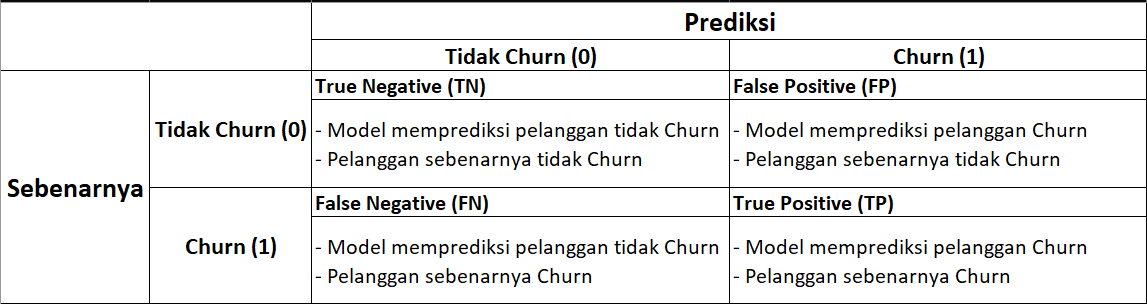

**Type 1 Error: False Positive**
- Kondisi dan Dampak : Dalam konteks prediksi Churn, Type 1 Error terjadi ketika model memprediksi bahwa seorang pelanggan akan Churn, tetapi kenyataannya, pelanggan tersebut tidak meninggalkan platform E-Commerce. Dampak dari kesalahan prediksi ini adalah perusahaan mungkin mengambil langkah-langkah pencegahan yang tidak diperlukan, seperti memberikan program diskon kepada pelanggan yang sebenarnya tidak berencana untuk meninggalkan platform. Ini dapat mengakibatkan peningkatan biaya perusahaan tanpa mendapatkan manfaat yang sepadan. Namun, pelanggan tersebut mungkin akan meningkatkan transaksi belanjanya di platform E-commerce ini.
- Terdapat biaya yang harus dikeluarkan perusahaan jika terjadi Type 2 Error, yaitu memberikan program diskon. Salah satu cara meningkatkan loyalitas customer adalah dengan memberikan diskon, seperti voucher gratis ongkos kirim, reward customer loyal, diskon pemebelian barang dalam jumlah banyak, dsb. Diskon tersebut dapat diberikan secara langsung atau dalam bentuk kupon (sumber [ottopay.com](https://ottopay.id/blog/artikel/contoh-loyalty-program/)). Sehingga biaya yang harus dikeluarkan perusahaan adalah Rp50.000 per customer.

**Type 2 Error: False Negative**
- Kondisi dan Dampak : Dalam hal Type 2 Error, model memprediksi bahwa pelanggan tidak akan Churn, padahal kenyataannya, pelanggan tersebut benar-benar meninggalkan platform E-Commerce. Dampak dari kesalahan prediksi ini lebih serius karena perusahaan kehilangan pelanggan dan pendapatan yang mungkin dapat dipertahankan atau ditingkatkan melalui langkah-langkah pencegahan. Perusahaan menjadi tidak mengambil tindakan yang diperlukan untuk mempertahankan hubungan dengan pelanggan yang sebenarnya berpotensi untuk Churn.
- Selain kehilangan pendapatan, terdapat biaya yang harus dikeluarkan perusahaan jika terjadi Type 2 Error, yaitu biaya *Customer acquisition cost* atau biaya akuisisi pelanggan. CAC merupakan cara untuk mengukur berapa banyak uang yang dihabiskan bisnis dalam menarik pelanggan baru (sumber [mekari.com](https://qontak.com/blog/cara-menghitung-customer-acquisition-cost/)). Rumusnya adalah sebagai berikut : 
<br>CAC = (Total Biaya Pemasaran + Total Biaya Penjualan)/ Jumlah Pelanggan Baru
<br>Kita asumsikan perusahaan menghabiskan Rp150.000.000 dalam biaya pemasaran dan penjualan dalam bulan tertentu dan berhasil mendapatkan 1000 pelanggan baru, maka biaya yang harus dikeluarkan perusahaan adalah Rp150.000 per customer

Berdasarkan dampak yang terjadi akibat kesalahan prediksi oleh model, fokus utama adalah pada mengurangi False Negative (FN). Kesalahan FN memiliki dampak yang lebih besar pada perusahaan dibandingkan FP, sehingga kami mengutamakan F2-Score sebagai metrik evaluasi model. Pemilihan F2-Score didasarkan dari biaya yang dikeluarkan perusahaan pada FN lebih dari 2x lebih besar dibandingkan FP. Sehingga, perusahaan akan lebih berorientasi untuk mengidentifikasi pelanggan yang berpotensi Churn, bahkan jika ada sedikit kesalahan dalam memprediksi pelanggan yang sebenarnya tidak Churn. Ini memberikan perusahaan kesempatan untuk mengambil tindakan preventif dan mempertahankan pelanggan, yang dapat mengurangi kerugian pendapatan akibat Churn.


# **Data Understanding**

Dataset source : <https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data>

Note :
- Dataset tidak seimbang antara yang Churn dengan yang tidak Churn
- Setiap baris merepresentasikan informasi terkait pelanggan yang berbelanja di platform E-Commerce

**Atribute Information**


| **Data** | **Variable** | **Description** |
|:---:|:---:|:---:|
| E Comm | CustomerID | ID unik pelanggan |
| E Comm | Churn | Tanda Churn |
| E Comm | Tenure | Masa pelanggan bergabung dalam organisasi (satuan bulan)|
| E Comm | PreferredLoginDevice | Perangkat login yang disukai pelanggan |
| E Comm | CityTier | Tingkatan kota |
| E Comm | WarehouseToHome | Jarak antara gudang ke rumah pelanggan |
| E Comm | PreferredPaymentMode | Metode pembayaran yang disukai pelanggan |
| E Comm | Gender | Jenis kelamin pelanggan |
| E Comm | HourSpendOnApp | Jumlah jam yang dihabiskan pelanggan di aplikasi seluler atau situs web |
| E Comm | NumberOfDeviceRegistered | Total jumlah perangkat yang terdaftar pada pelanggan tertentu |
| E Comm | PreferedOrderCat | Kategori pesanan yang disukai pelanggan dalam sebulan terakhir |
| E Comm | SatisfactionScore | Skor kepuasan pelanggan terhadap layanan |
| E Comm | MaritalStatus | Status pernikahan pelanggan |
| E Comm | NumberOfAddress | Total jumlah alamat yang ditambahkan pada pelanggan tertentu |
| E Comm | Complain | Ada/ tidak keluhan yang diajukan dalam sebulan terakhir |
| E Comm | OrderAmountHikeFromlastYear | Persentase peningkatan pesanan dari tahun lalu |
| E Comm | CouponUsed | Total jumlah kupon yang digunakan dalam sebulan terakhir |
| E Comm | OrderCount | Total jumlah pesanan dalam sebulan terakhir |
| E Comm | DaySinceLastOrder | Hari sejak pesanan terakhir oleh pelanggan |
| E Comm | CashbackAmount | Rata-rata cashback dalam sebulan terakhir (Rupee) |

In [56]:
# import library explorasi data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv('E_Commerce_Dataset.csv')
display(df.head(), df.tail())

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


Tabel diatas menampilkan 5 data teratas dan 5 data terbawah dari keseluruhan dataset.

In [58]:
# informasi tipe dataset kita
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# **Data Cleaning**
## **Numerical Data Checking**

In [59]:
# Statistik deskriptif (numerik) dataset kita
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [60]:
pd.set_option('display.max_colwidth', None)

num = []

for i in df.describe().columns[:-1]:
    num.append([i, df[i].dtype, list(df[i].drop_duplicates().values)])

df_num = pd.DataFrame(columns=['feature','dataType','unique'], data=num)
df_num

,feature,dataType,unique
0,CustomerID,int64,"[50001, 50002, 50003, 50004, 50005, 50006, 50007, 50008, 50009, 50010, 50011, 50012, 50013, 50014, 50015, 50016, 50017, 50018, 50019, 50020, 50021, 50022, 50023, 50024, 50025, 50026, 50027, 50028, 50029, 50030, 50031, 50032, 50033, 50034, 50035, 50036, 50037, 50038, 50039, 50040, 50041, 50042, 50043, 50044, 50045, 50046, 50047, 50048, 50049, 50050, 50051, 50052, 50053, 50054, 50055, 50056, 50057, 50058, 50059, 50060, 50061, 50062, 50063, 50064, 50065, 50066, 50067, 50068, 50069, 50070, 50071, 50072, 50073, 50074, 50075, 50076, 50077, 50078, 50079, 50080, 50081, 50082, 50083, 50084, 50085, 50086, 50087, 50088, 50089, 50090, 50091, 50092, 50093, 50094, 50095, 50096, 50097, 50098, 50099, 50100, ...]"
1,Churn,int64,"[1, 0]"
2,Tenure,float64,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 14.0, 8.0, 18.0, 5.0, 2.0, 30.0, 1.0, 23.0, 3.0, 29.0, 6.0, 26.0, 28.0, 7.0, 24.0, 25.0, 10.0, 15.0, 22.0, 27.0, 16.0, 12.0, 21.0, 17.0, 50.0, 60.0, 31.0, 51.0, 61.0]"
3,CityTier,int64,"[3, 1, 2]"
4,WarehouseToHome,float64,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, 31.0, 18.0, 13.0, 20.0, 29.0, 28.0, 26.0, 14.0, nan, 10.0, 27.0, 17.0, 23.0, 33.0, 19.0, 35.0, 24.0, 16.0, 25.0, 32.0, 34.0, 5.0, 21.0, 126.0, 7.0, 36.0, 127.0]"
5,HourSpendOnApp,float64,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
6,NumberOfDeviceRegistered,int64,"[3, 4, 5, 2, 1, 6]"
7,SatisfactionScore,int64,"[2, 3, 5, 4, 1]"
8,NumberOfAddress,int64,"[9, 7, 6, 8, 3, 2, 4, 10, 1, 5, 19, 21, 11, 20, 22]"
9,Complain,int64,"[1, 0]"


Jika kita lihat tabel statistik deskriptif di atas, semua data numerik sudah sesuai pada umumnya. Namun, jika kita lihat tabel ke-2, kita dapat melihat terdapat data yang seluruh isinya adalah bilangan bulat, tidak ada koma dibelakang 0 tetapi masih terisi float64. Maka dari itu kami akan mengubah data tersebut menjadi int64 pada kolom Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, dan DaySinceLastOrder setelah missing value dihandle.

## **Categorical Data Checking**

In [61]:
# Print setiap unique dalam data kategorik untuk memeriksa apahkah ada typo ataupun data yang sama dengan nama yang berbeda.

unique_dict = {}

for col in df.columns:                                                  # Mencari unique pada data kategorik dan menyimpannya dalam dictionary
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        unique_dict[col] = df[col].unique()

for col, unique in unique_dict.items():                                 # Print setiap unique pada data kategorik dengan looping.
    print(f"'{col}' unique:\n{unique}\n")

'PreferredLoginDevice' unique:
['Mobile Phone' 'Phone' 'Computer']

'PreferredPaymentMode' unique:
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

'Gender' unique:
['Female' 'Male']

'PreferedOrderCat' unique:
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

'MaritalStatus' unique:
['Single' 'Divorced' 'Married']



Seluruh data kategorik tidak ada yang typo, namun ada data yang sama dengan nama yang berbeda. Sehingga data tersebut perlu diganti namanya menjadi satu kategori saja.

In [62]:
# Kategori PreferredLoginDevice
df['PreferredLoginDevice'].replace(['Phone'], ['Mobile Phone'], inplace=True)

# Kategori PreferredPaymentMode
df['PreferredPaymentMode'].replace(['CC'],['Credit Card'],inplace=True)
df['PreferredPaymentMode'].replace(['Cash on Delivery'],['COD'],inplace=True)

# Kategori PreferedOrderCat
df['PreferedOrderCat'].replace(['Mobile'],['Mobile Phone'],inplace=True)


In [63]:
# Statistik deskriptif (kategori) dataset kita
DCategory = df.describe(include='object').T
DCategory['%Top'] = (DCategory['freq']/DCategory['count']*100).astype(int)
DCategory

,count,unique,top,freq,%Top
PreferredLoginDevice,5630,2,Mobile Phone,3996,70
PreferredPaymentMode,5630,5,Debit Card,2314,41
Gender,5630,2,Male,3384,60
PreferedOrderCat,5630,5,Mobile Phone,2080,36
MaritalStatus,5630,3,Married,2986,53


## **Duplicated Data**

In [64]:
df.duplicated().sum()

0

Tidak ditemukan adanya data duplikat.

## **Outliers**

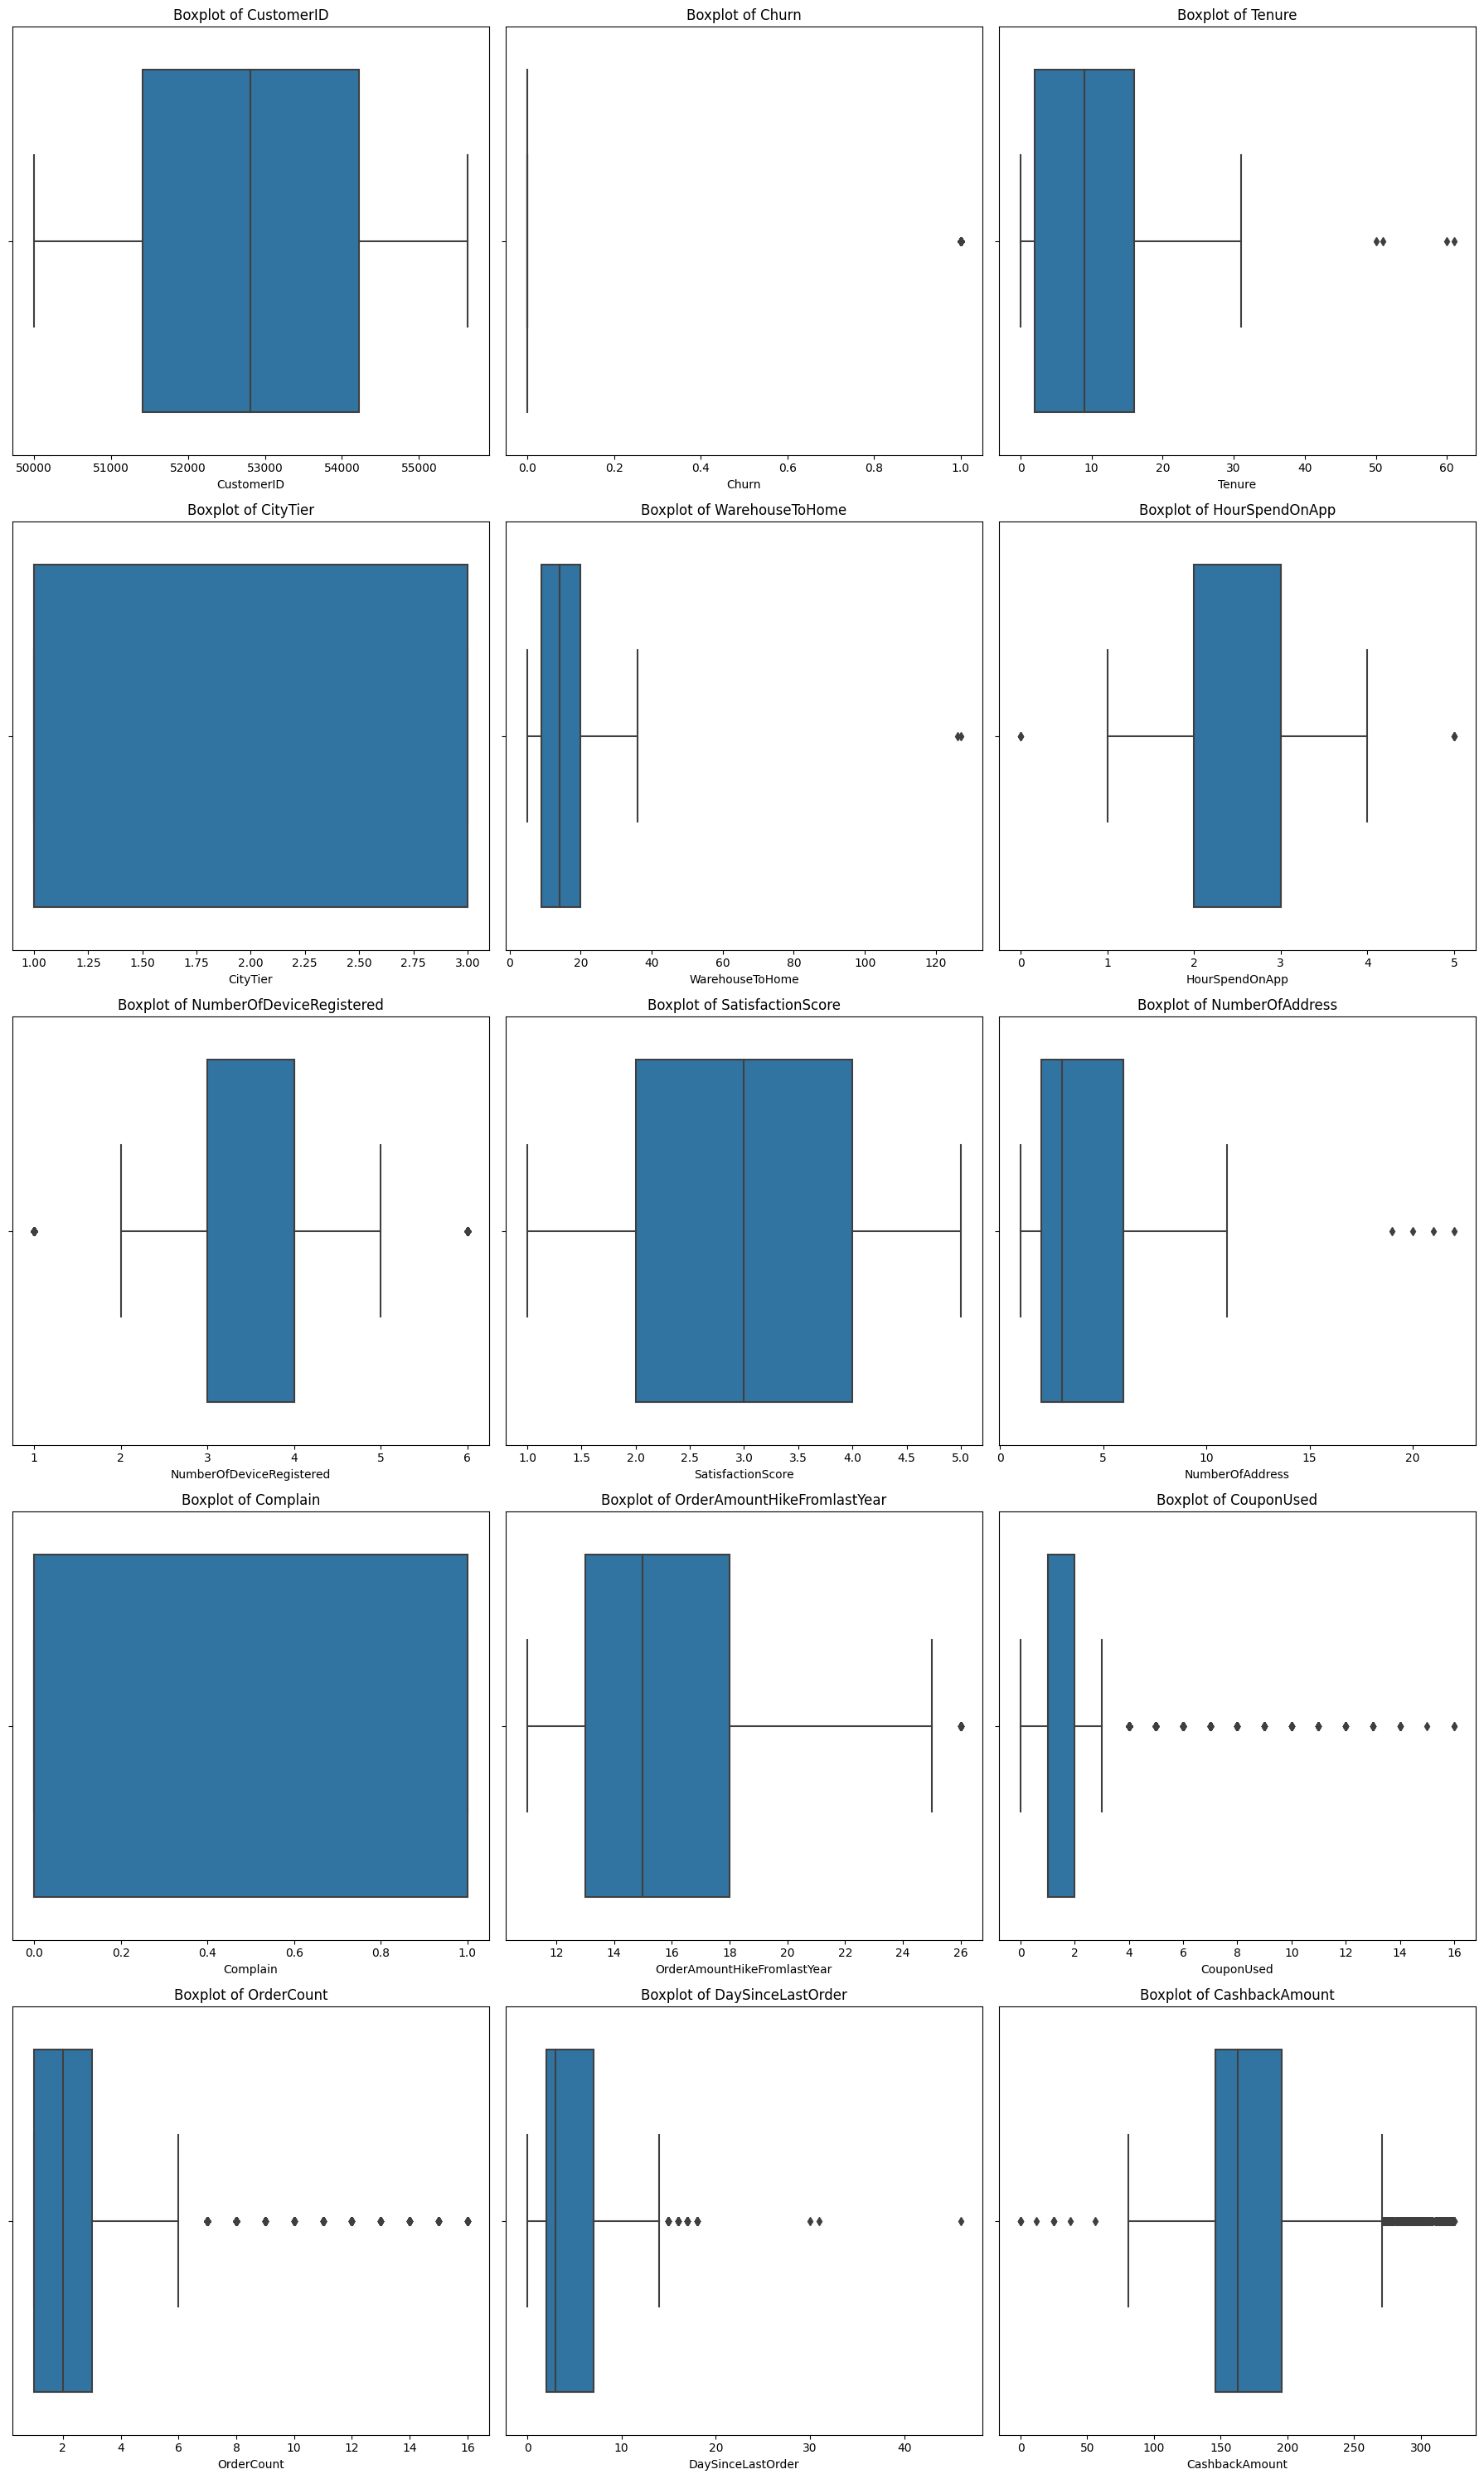

In [65]:
def numerical_boxplots(data):                                                           # Define function untuk membuat boxplot semua data numerik.
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.ravel()                                                                 # Flatten the 2D array of axes

    for i, column in enumerate(numerical_columns):                                      # Membuat boxplot untuk setiap data numerik dengan looping
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')

    # Menyembunyikan subplots yang kosong
    for i in range(num_plots, num_rows * 3):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


numerical_boxplots(df)

Dikarenakan outliers yang ada tidak terlalu banyak dan juga masih merupakan data yang dapat dipakai untuk analisa maka diputuskan untuk tidak menghapus outlier.

## **Missing Values**

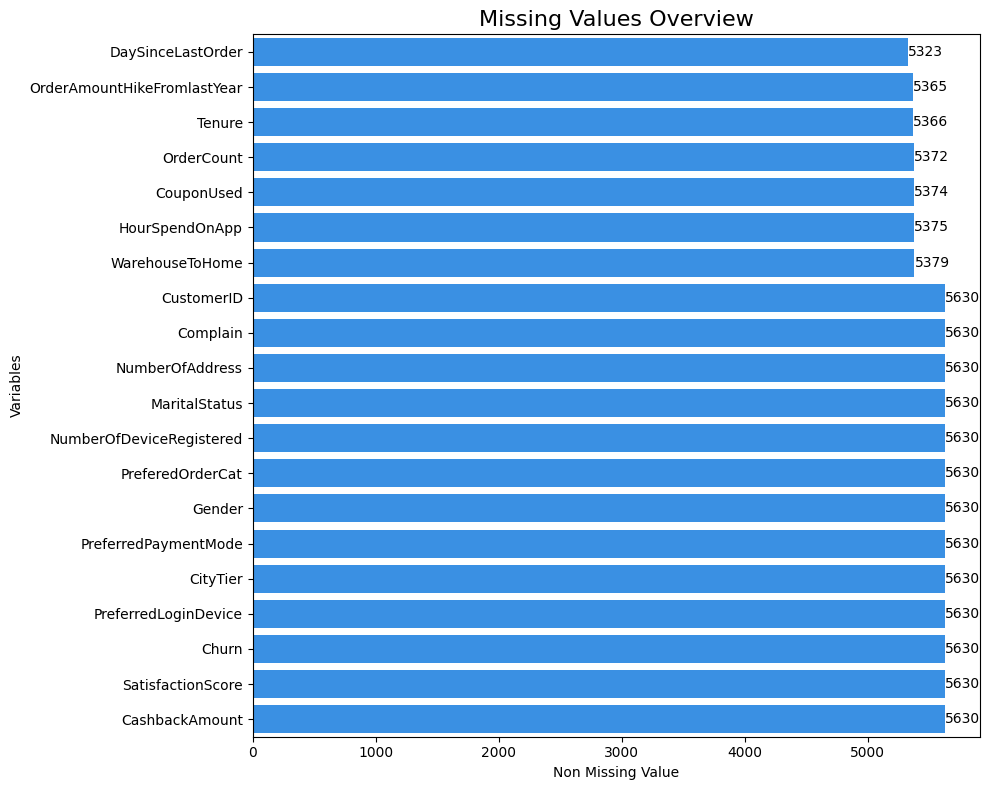

In [66]:
# Jumlah per kolom
missing_values = pd.DataFrame(df.count()).reset_index()
missing_values = missing_values.rename(columns={'index':'Variables',
                                        0:'Missing Values'}).sort_values('Missing Values', ascending=True)

# Rinkasan untuk Plotting
plt.figure(figsize=(10,8))
ax = sns.barplot(missing_values, y='Variables', x='Missing Values', color='dodgerblue')

for index, value in enumerate(missing_values['Missing Values']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
    
plt.title('Missing Values Overview', fontsize=16)
plt.xlabel('Non Missing Value')

plt.tight_layout();

Text(0.5, 1.0, 'Distribution of Missing Value')

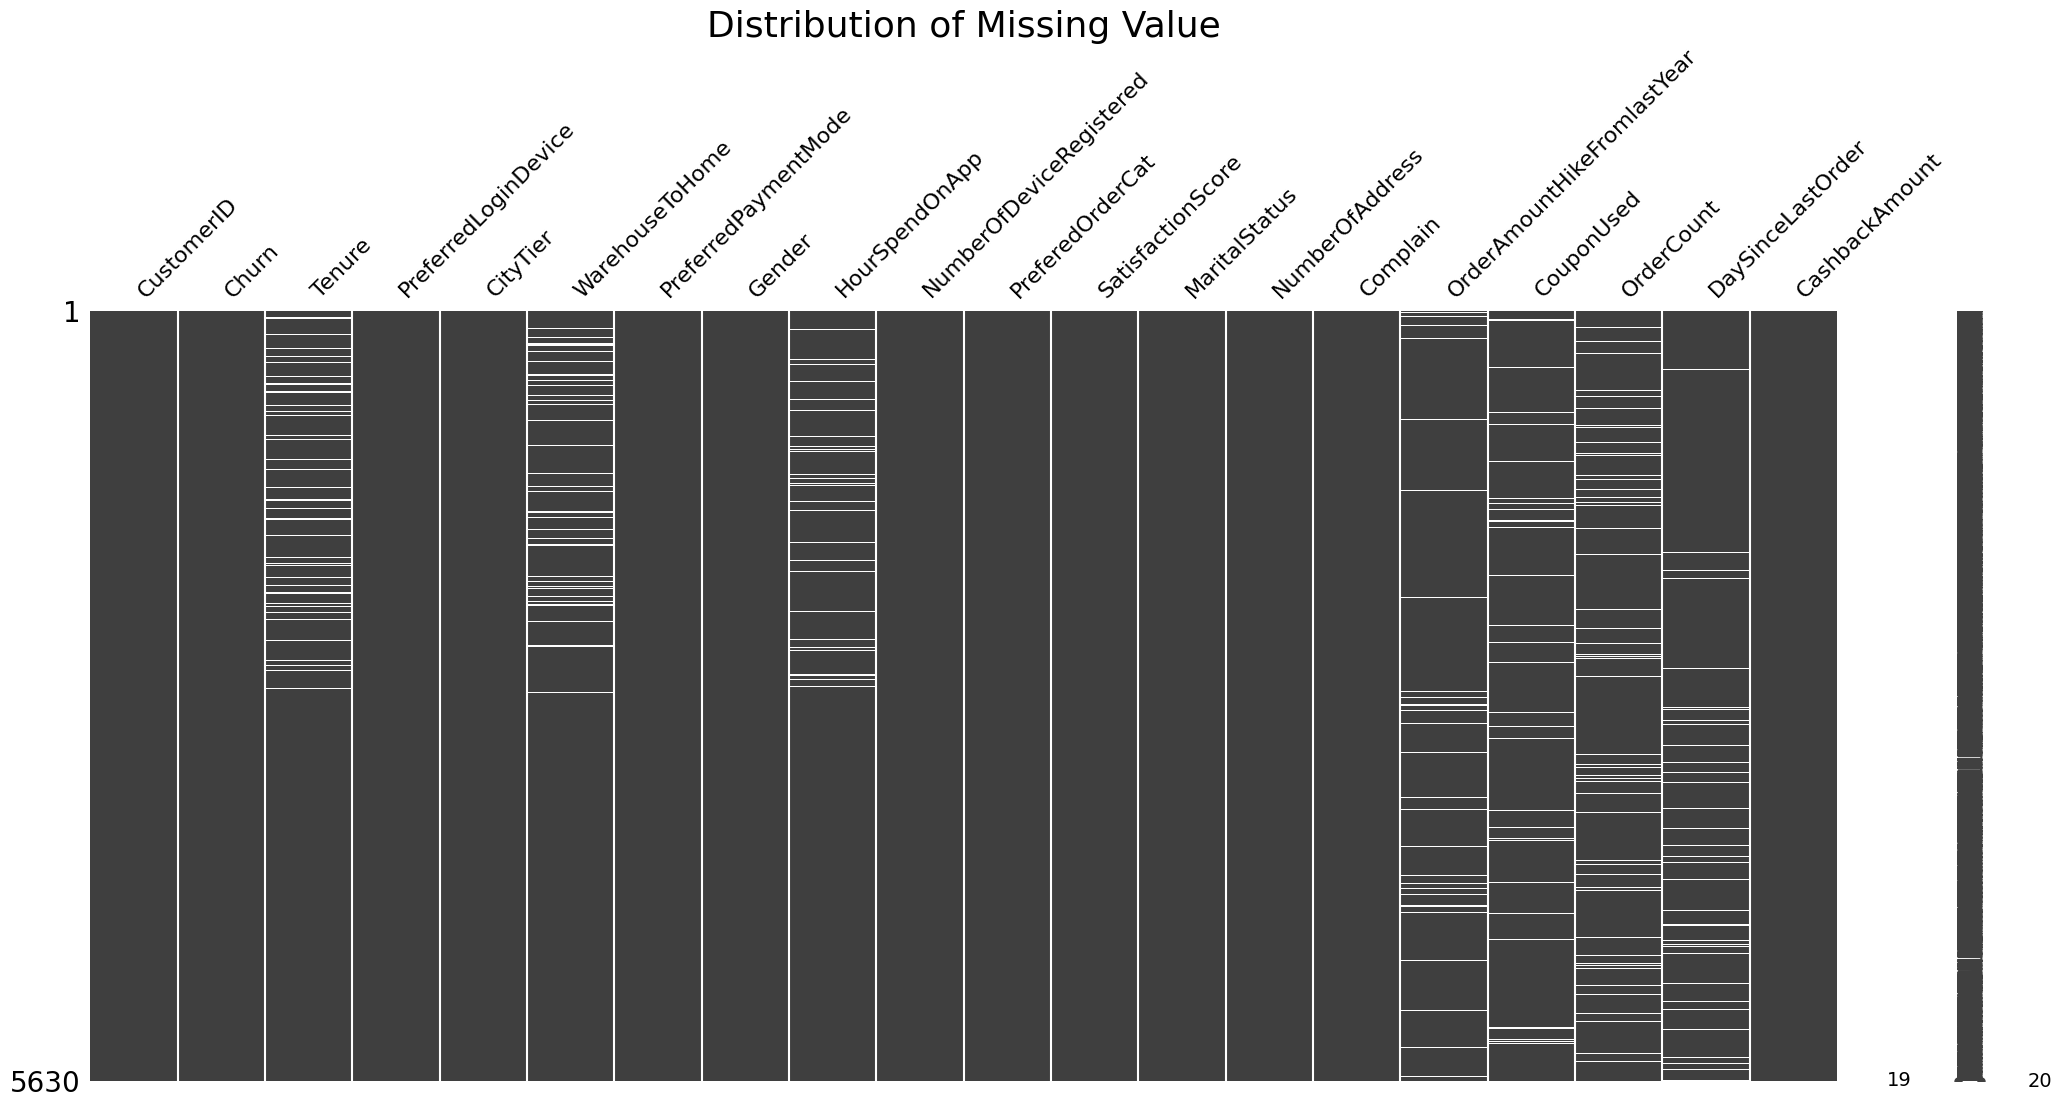

In [67]:
msno.matrix(df)
plt.title('Distribution of Missing Value', fontsize=26)

Semua nilai yang hilang merupakan data numerik. <br> Jumlah nilai yang hilang tidak terlalu cukup signifikan per kolom, namun nilai-nilai yang hilang tersebut tersebar luas di berbagai variabel. Oleh karena itu, data yang mempunyai nilai yang hilang tidak dapat dihapus begitu saja.

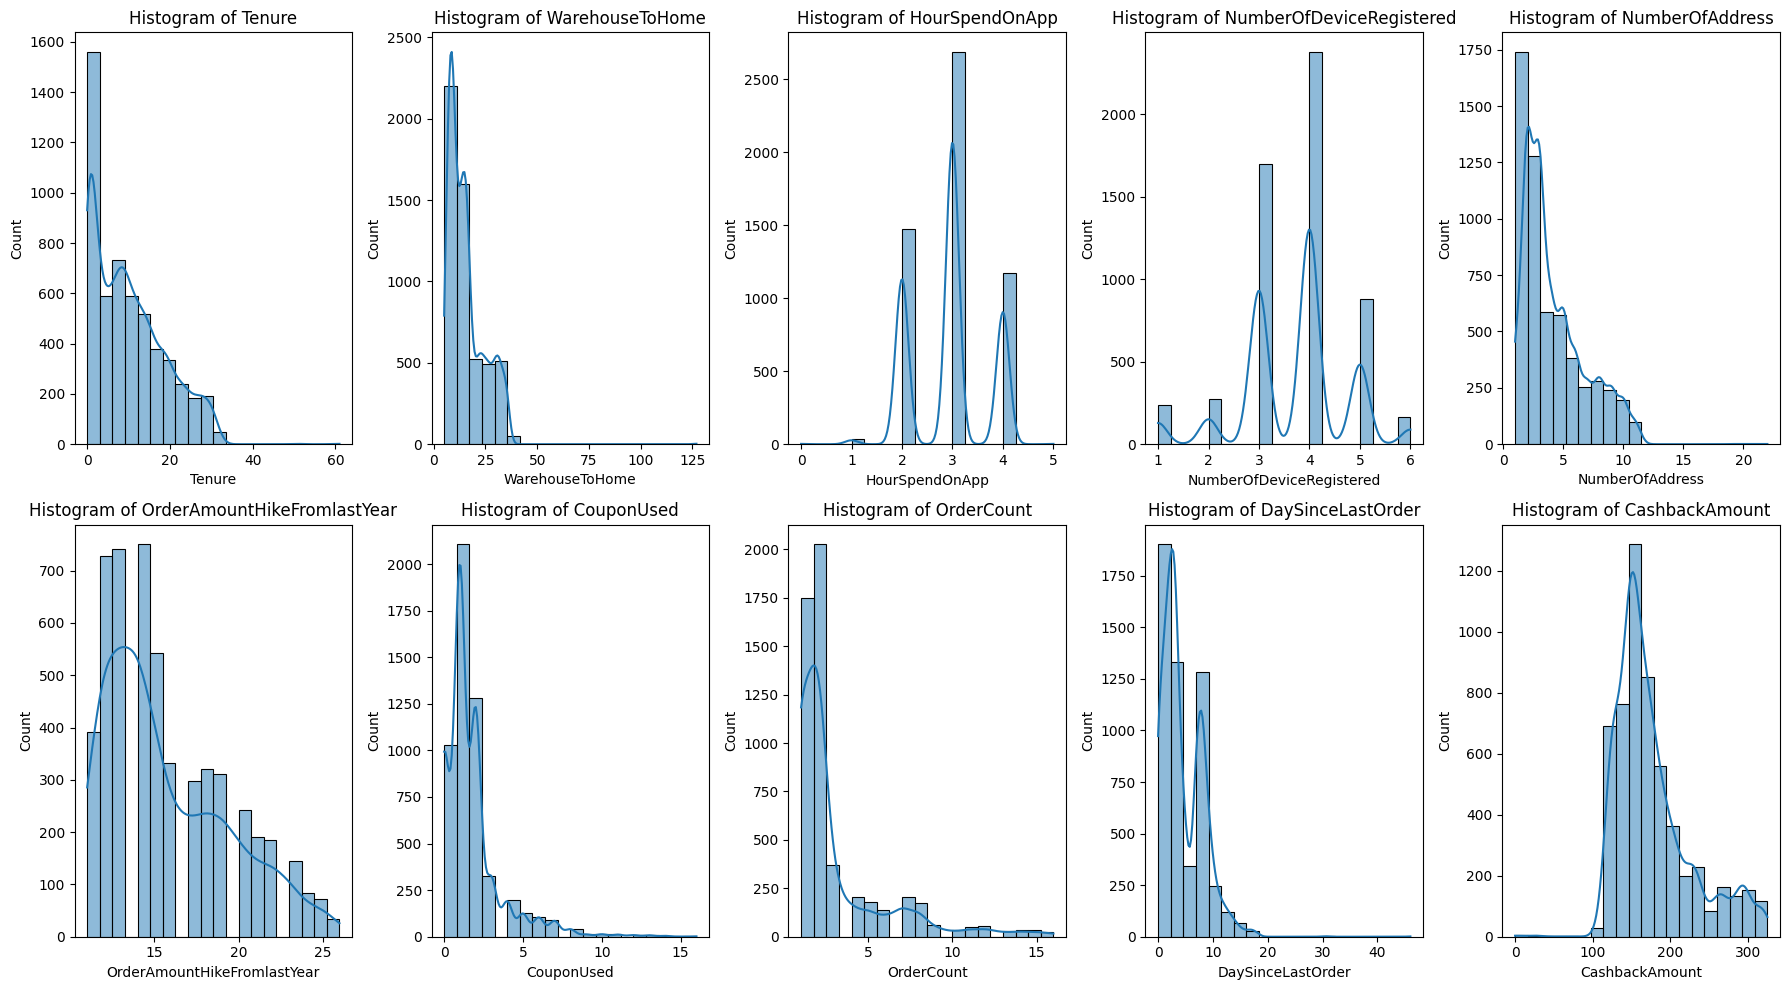

In [68]:
def numerical_histogram(data):
    numerical_columns = data.select_dtypes(include=['int64','float64']).drop(columns=['CustomerID','Churn','CityTier','SatisfactionScore','Complain']).columns
    num_plots = len(numerical_columns)
    num_rows = 2
    num_cols = 5

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    axes = axes.ravel()

    for i, column in enumerate(numerical_columns):
        row = i // num_cols
        col = i % num_cols
        sns.histplot(data=data, x=column, kde=True, ax=axes[i], bins=20)
        axes[i].set_title(f'Histogram of {column}')

    # Menyembunyikan subplots yang kosong
    for i in range(num_plots, num_rows * num_cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk DataFrame (df)
numerical_histogram(df)


In [69]:
shapirocolumns = df.select_dtypes(include=['int64','float64']).drop(columns=['CustomerID','Churn','CityTier','SatisfactionScore','Complain']).columns


shapiro_df = pd.DataFrame(columns=['Variables','Shapiro Pvalue'])
for value in shapirocolumns:
    pvalue = shapiro(df[value].dropna())[1]
    shapiro_df.loc[len(shapiro_df)] = {'Variables':value,'Shapiro Pvalue':pvalue}
shapiro_df

,Variables,Shapiro Pvalue
0,Tenure,0.0
1,WarehouseToHome,0.0
2,HourSpendOnApp,0.0
3,NumberOfDeviceRegistered,0.0
4,NumberOfAddress,0.0
5,OrderAmountHikeFromlastYear,0.0
6,CouponUsed,0.0
7,OrderCount,0.0
8,DaySinceLastOrder,0.0
9,CashbackAmount,0.0


Dari histogram dan uji normalitas **(Shapiro Pvalue < 0.05)** didapati semua data numerik tidak terdistribusi normal.<br> Oleh karena itu, nilai yang hilang ini dapat diisi dengan median.

In [189]:
# Filter Data Numerik
num_cols = df.select_dtypes(include=['float64','int64']).columns

# Mengisi data dengan median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Memastikan sudah tidak ada data kosong
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Di atas kita sudah mengetahui bahwa terdapat format data yang tidak sesuai. Maka kami akan memperbaiki tipe data float yang tidak sesuai menjadi integer.

In [71]:
kol_float = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for i in kol_float:
    df[i] = df[i].astype('int64')

# Memastikan tipe data sudah berubah
print(df[kol_float].dtypes)


Tenure                         int64
WarehouseToHome                int64
HourSpendOnApp                 int64
OrderAmountHikeFromlastYear    int64
CouponUsed                     int64
OrderCount                     int64
DaySinceLastOrder              int64
dtype: object


# **Export Clean Data**

In [72]:
# Export data yang sudah bersih untuk keperluan eksternal dari python analysis
df.to_csv('CleanEcommerceChurn.csv', index=False)

# **Exploratory Data Analysis**

### **1. Churn vs Stay**

''

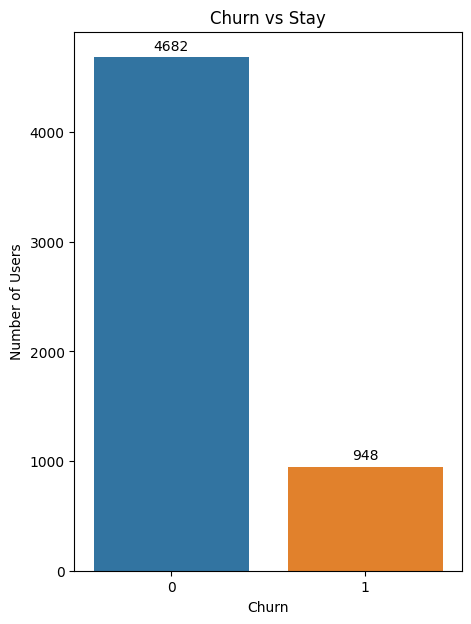

In [73]:
plt.figure(figsize=(5,7))
plt.title('Churn vs Stay')
ax = sns.countplot(data=df, x='Churn')
plt.ylabel('Number of Users')
for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
;

**Insights:**

Data yang kita miliki tidak seimbang: lebih banyak user yang **stay/tidak churn (4682)** daripada yang **churn (948).** Artinya dalam sample data pelanggan yang kita miliki yaitu, 5630 pelanggan, tingkat Churnnya mencapai **16.8%**. Menurut website [sab.id](https://www.sab.id/churn-rate-dalam-metrik-digital-marketing-apa-itu/) rata-rata Churn Rate di industri e-commerce adalah 10%. Sehingga perusahaan-perusahaan dengan churn rate lebih rendah memiliki tingkat pertumbuhan dan profitabilitas yang lebih tinggi. Berdasarkan grafik di atas, terlihat bahwa tingkat Churn perusahaan E-Commerce ini lebih tinggi dari nilai rata-rata. Sehingga dapat dikatakan tingkat pertumbuhan dan profitabilitasnya masih rendah. Maka dari itu, sangat penting bagi perusahaan E-Commerce ini untuk mengurangi/ meniminalisir terjadinya Churn.

### **2. Heatmap Korelasi**

Pada bagian ini, kita akan coba melihat bagaimana keterkaitan antara sesama fitur numerik pada data kita, menggunakan heatmap korelasi. Dikarenakan di atas telah ditemukan bahwa data ini banyak yang tidak terdistribusi normal, maka metode yang dipilih dalam melihat korelasi adalah spearman.

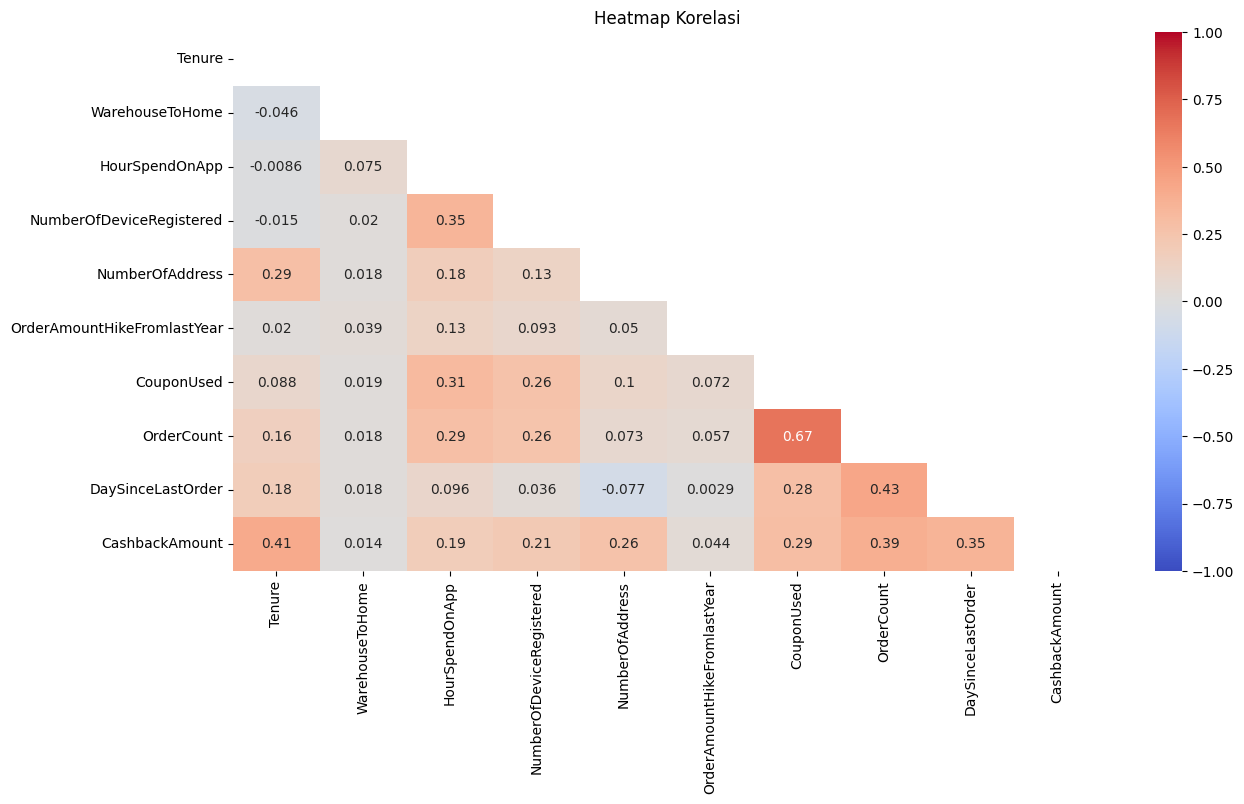

In [74]:
matrix = df.drop(columns=['CustomerID','CityTier','SatisfactionScore','Complain', 'Churn']).corr(numeric_only=True, method='spearman')
plt.figure(figsize=(14,7))
plt.title('Heatmap Korelasi')
sns.heatmap(data=matrix,
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            mask=np.triu(matrix), 
            vmin=-1, 
            vmax=1 
            );

**Insights:**

- Tidak ada korelasi yang kuat **(nilai korelasi > 0.6)** di antara semua variabel, kecuali **CouponUsed vs OrderCount**. Artinya semakin banyak kupon digunakan, maka semakin banyak jumlah pesanan yang dilakukan pelanggan tersebut.
- Namun masih terdapat korelasi yang moderate, namun masih belum dapat disebut kuat, yaitu **OrderCount vs DaySinceLastOrder** sebesar 0.43. Artinya pelanggan yang banyak melakukan Order/ pesanan dalam sebulan terakhir dilakukan pada awal bulan. Kemudian dilanjutkan oleh **Tenure vs CashbackAmount** sebesar 0.41. Artinya semakin lama pelanggan menggunakan E-Commerce tersebut, maka semakin banyak jumlah Cashback yang diterima dalam satu bulan terakhir. 

### **3. Churn vs Data Numerikal**

Pada bagian ini kita akan coba melihat hubungan antara Churn dengan fitur numerikal yang ada di data kita. Meskipun pada data yang kita miliki Churn terdiri dari 0 & 1 (numerik), namun sebenarnya Churn adalah data kategorikal yang sudah ter-*encoding*. Jika kita terjemahkan datanya maka : 0 adalah pelanggan yang tidak Churn dan 1 adalah pelanggan yang Churn. Sebelumnya kita akan coba melihat perbandingan persebaran Churn dan Tidak Churn pada data numerikal yang kita miliki.

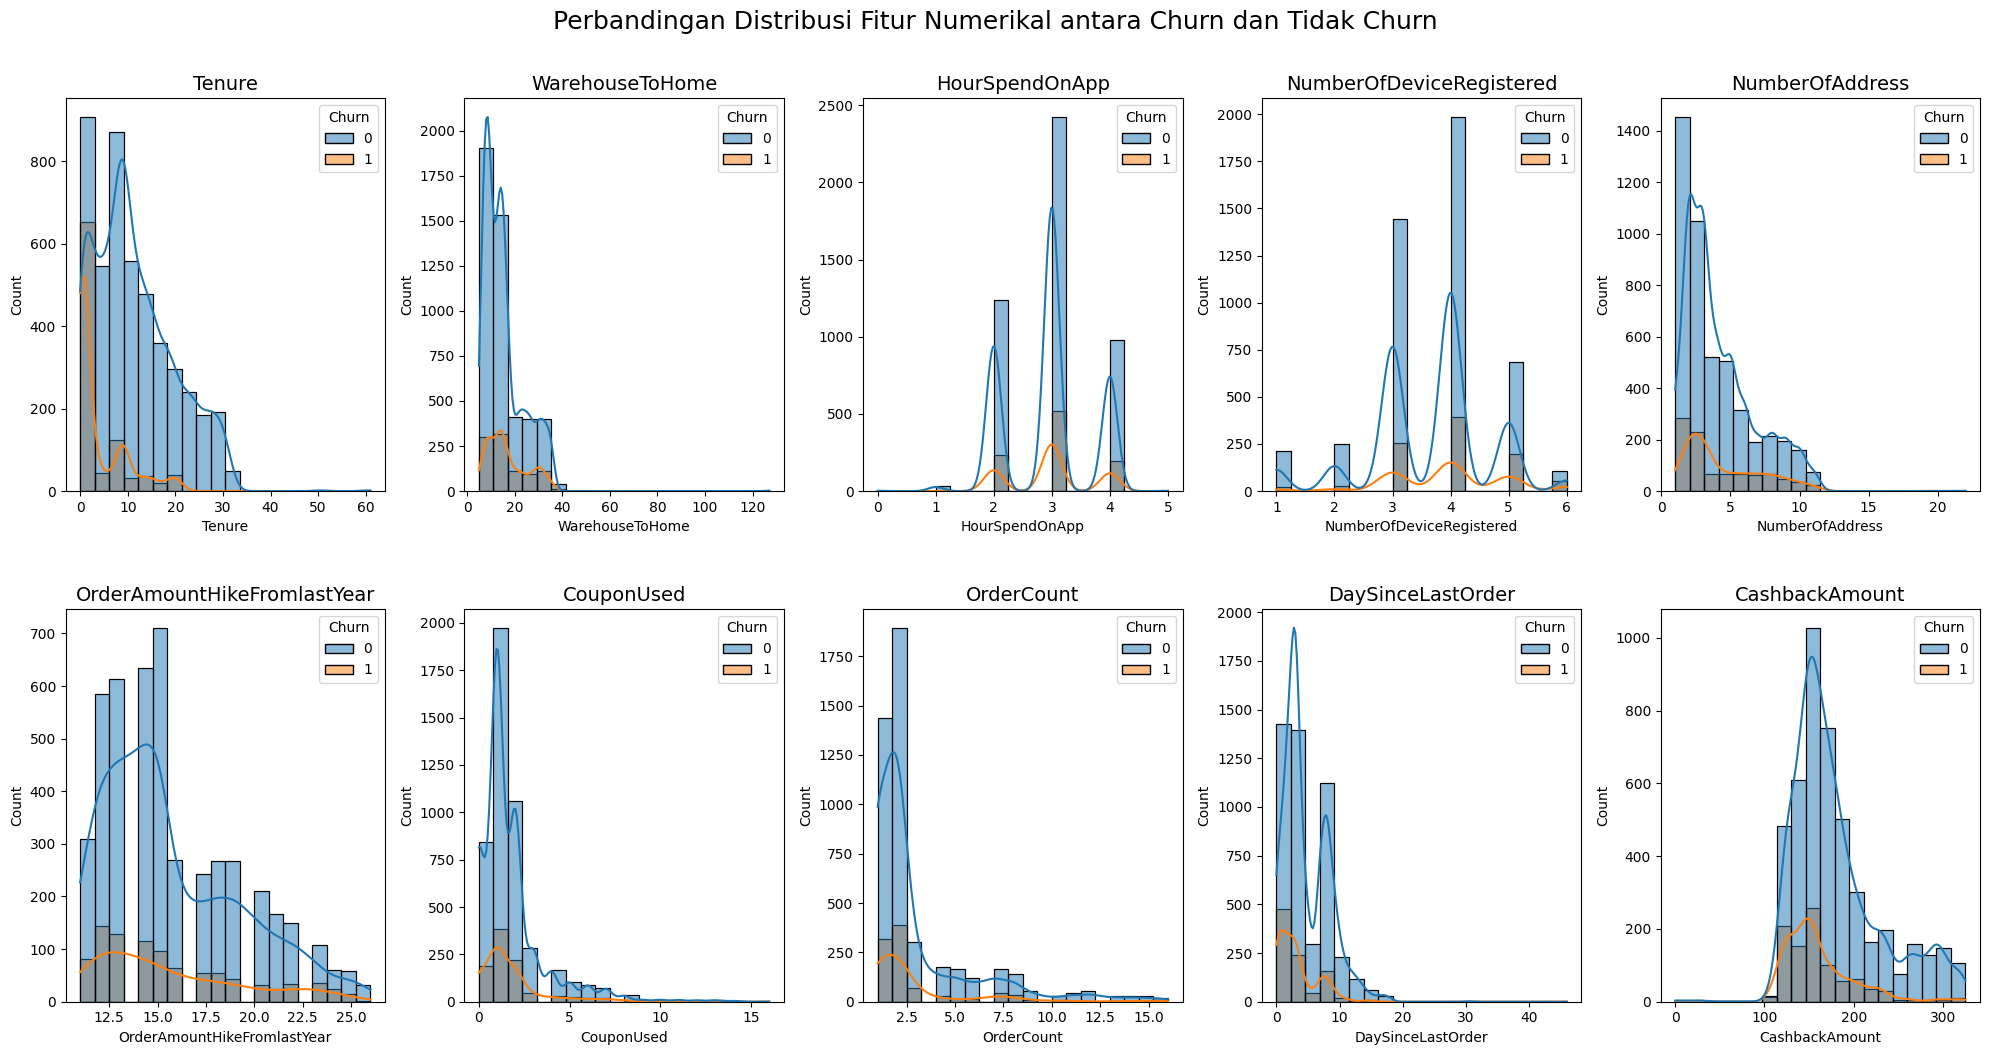

In [75]:
num = df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp','NumberOfDeviceRegistered', 'NumberOfAddress',
          'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]

plt.figure(figsize=(20, 10))
subplot = 1

for i in num:
    plt.subplot(2, 5, subplot)
    sns.histplot(data=df, x=i, hue='Churn', kde=True, bins=20)
    plt.title(i, fontsize=14)
    subplot += 1

# Menampilkan plot dengan jarak antar subplot
plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.suptitle('Perbandingan Distribusi Fitur Numerikal antara Churn dan Tidak Churn', y=1.05, fontsize=18)
plt.show()

Dari histogram di atas, kita dapat melihat persebaran data yang Tidak Churn (0) dan Churn (1) sama-sama tidak ada yang terdistribusi normal. Maka dari itu kami akan coba menampilkan hubungan antara Churn dengan fitur numerik lainnya menggunakan nilai median.

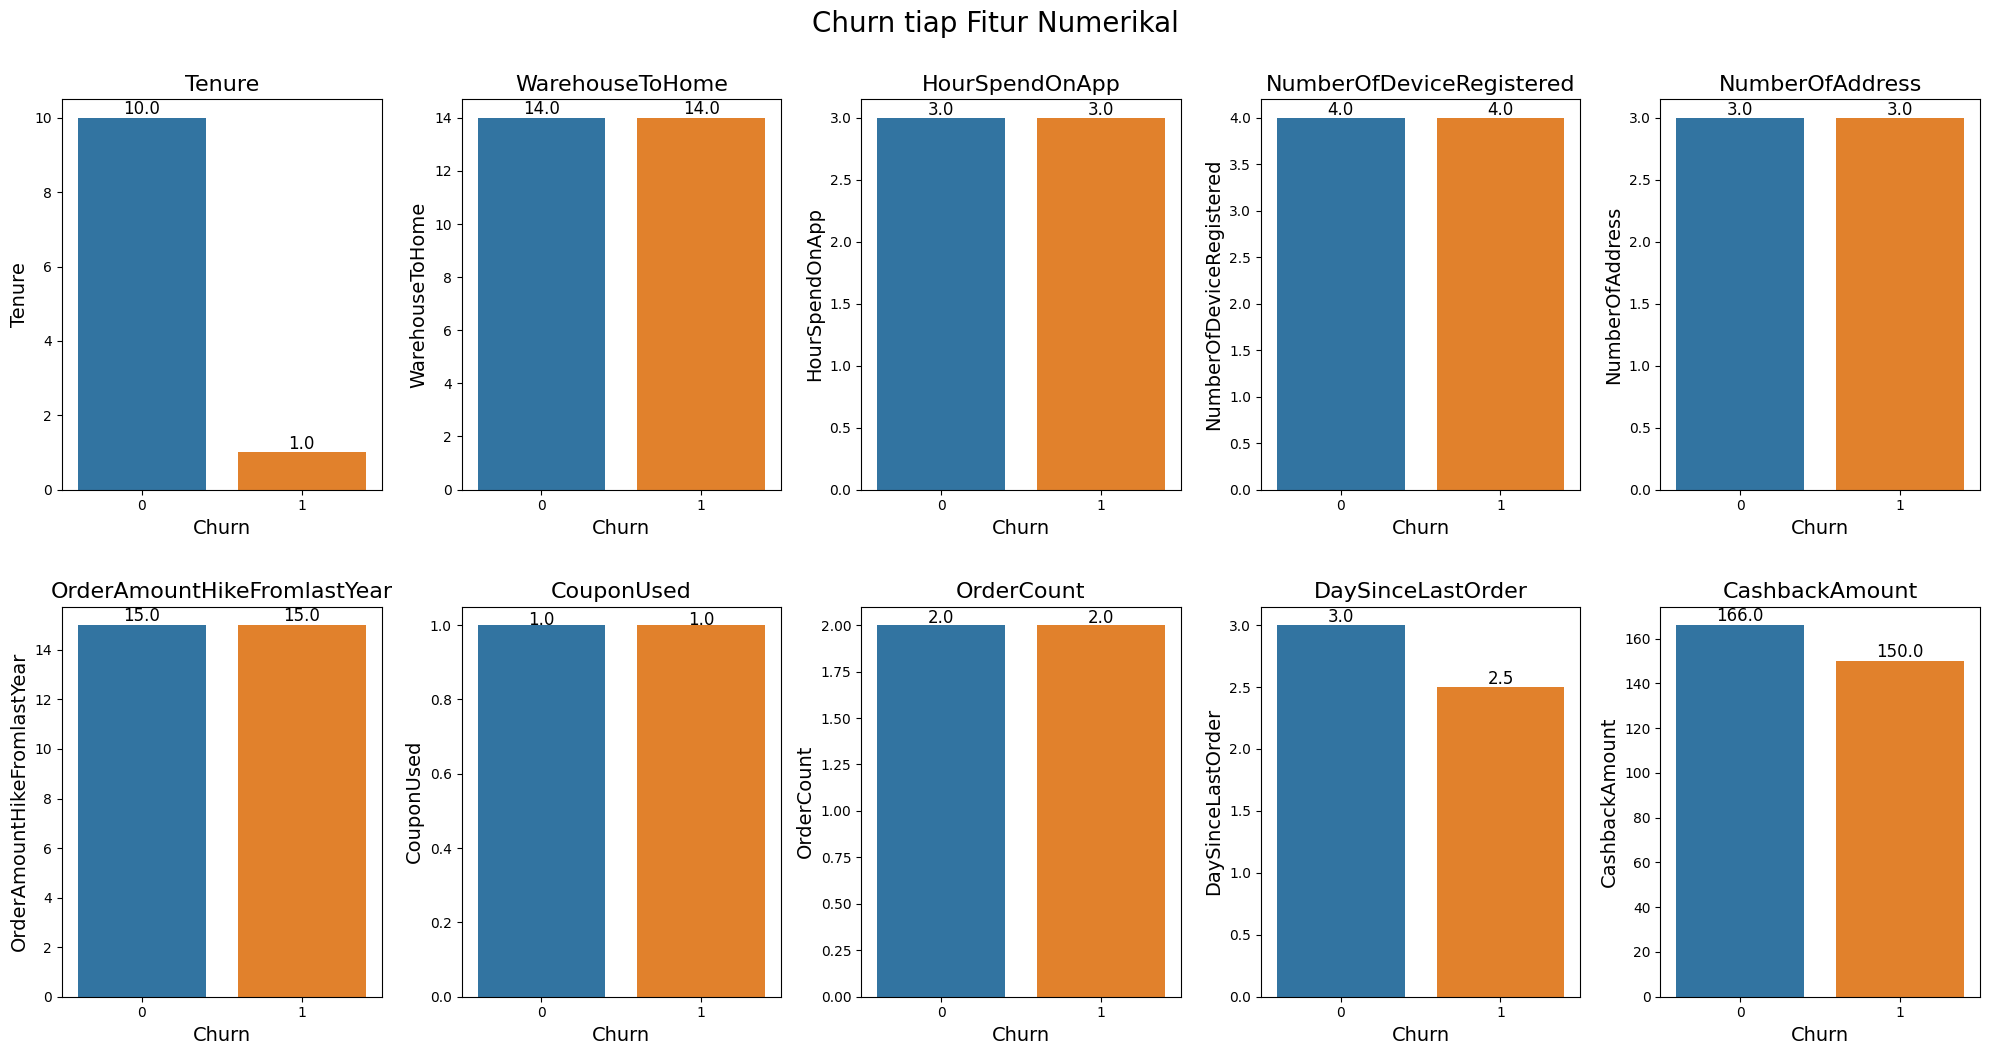

In [76]:

plt.figure(figsize=(20, 10))
subplot = 1

for i in num:
    plt.subplot(2, 5, subplot)
    ax = sns.barplot(data=df, x='Churn', y=i, estimator=np.median, ci=None)

    # Anotasi
    for p in ax.patches:
        median_value = p.get_height()
        x_position = p.get_x() + p.get_width() / 2
        y_position = p.get_height()
        ax.annotate(f'{median_value:.1f}', (x_position, y_position - 0.01), ha='center', va='bottom', fontsize=12)
    
    plt.title(i, fontsize=16)
    plt.xlabel('Churn', fontsize=14)
    plt.ylabel(i,fontsize=14)
    subplot += 1

# Menampilkan plot dengan jarak antar subplot
plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.suptitle('Churn tiap Fitur Numerikal', y=1.05, fontsize=20)
plt.show()


Meskipun grafik di atas sudah menampilkan ada/ tidaknya hubungan antara fitur numerik dengan Churn/ Tidak Churn, ada yang berbeda signifikan dan ada yang tidak berbeda signifikan. Namun, masih terdapat keraguan apakah fitur-fitur tersebut memiliki hubungan yang signifikan atau tidak, maka kami akan melakukan uji statistik. Uji statistik ini ditujukan ke seluruh fitur numerikal dengan data Churn menggunakan Mann-Whitney. Mann-Whitney digunakan untuk menguji 2 sample independen yang mirip dengan T-Test Unpaired, namun ini digunakan untuk versi statistik non-parametrik atau data yang tidak terdistribusi normal.

Pada kasus ini kita hendak menguji apakah ada perbedaaan yang signifikan tiap fitur numerik antara pelanggan yang Tidak Churn (0) dan Churn(1).<br>
Ho (Hipotesis Nol): Tidak ada perbedaan yang signifikan dalam fitur numerik antara pelanggan yang Tidak Churn dan Churn.<br>
Ha (Hipotesis Alternatif): Ada perbedaan yang signifikan dalam fitur numerik antara pelanggan yang Tidak Churn dan Churn.

In [77]:
from scipy.stats import mannwhitneyu

num_churn = df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']]

whitney_data = []

for i in num_churn.columns[:-1]:  # Exclude the 'Churn' column
    stat, pvalue = mannwhitneyu(
        num_churn[num_churn['Churn'] == 0][i],
        num_churn[num_churn['Churn'] == 1][i],
        alternative="two-sided"
    )
    # Menambahkan data ke list
    whitney_data.append({'Variables': i, 'MannWhitney Pvalue': pvalue})

# Membuat DataFrame dari list
whitney_df = pd.DataFrame(whitney_data)

# Menambahkan kolom baru berdasarkan kondisi p-value
whitney_df['Hypothesis Test Result'] = whitney_df['MannWhitney Pvalue'].apply(lambda x: 'Tolak Ho' if x <= 0.05 else 'Gagal Menolak Ho')

whitney_df


,Variables,MannWhitney Pvalue,Hypothesis Test Result
0,Tenure,1.309721e-181,Tolak Ho
1,WarehouseToHome,2.040864e-09,Tolak Ho
2,HourSpendOnApp,2.094594e-01,Gagal Menolak Ho
3,NumberOfDeviceRegistered,3.054189e-14,Tolak Ho
4,NumberOfAddress,3.049725e-02,Tolak Ho
5,OrderAmountHikeFromlastYear,1.043908e-01,Gagal Menolak Ho
6,CouponUsed,5.430024e-01,Gagal Menolak Ho
7,OrderCount,3.050037e-02,Tolak Ho
8,DaySinceLastOrder,1.070555e-41,Tolak Ho
9,CashbackAmount,2.223210e-38,Tolak Ho


**Insight**

Meskipun saat melihat pada barplot di atas, terdapat nilai median yang sama antara yang Churn & Tidak Churn, namun yang akan kami ambil adalah hasil dari uji statistik Mann-Whitney. Perbedaan hasil tersebut dikarenakan nilai median adalah suatu estimasi yang dihitung berdasarkan data yang diberikan. Sementara itu, uji statistik seperti Mann-Whitney adalah cara untuk menguji apakah perbedaan antara dua kelompok itu signifikan secara statistik. Selain itu uji statistik sensitif terhadap ukuran sampel. Dalam uji Mann-Whitney, semakin besar ukuran sampel, semakin kecil peluang mendapatkan nilai pvalue yang sama. Oleh karena itu, meskipun perbedaan nilai median mungkin kecil atau sama, jika ukuran sampel besar, uji statistik dapat menunjukkan perbedaan yang signifikan secara statistik.


Seletelah kita lihat uji statistiknya terdapat beberapa fitur yang ternyata memiliki pengaruh signifikan terhadap Churn:
- Tenure memiliki perbedaan yang signifikan antara yang Churn dan Tidak Churn. Hal ini dapat kita lihat dalam barplot di atas, bahwa pelanggan yang Tidak Churn merupakan pelanggan yang sudah lebih lama bergabung dalam E-Commerce ini. Sedangkan pelanggan yang baru begabung di E-Commerce ini cenderung untuk Churn. 
- Jarak antara Rumah ke Gudang juga memiliki perbedaan yang signifikan antara yang Churn dan Tidak Churn. Meskipun nilai mediannya sama, kita dapat asumsikan secara domain knowledge bahwa jarak Gudang ke rumah pelanggan : **dekat**, maka pelanggan cenderung Tidak Churn. Sedangkan jarak Gudang ke rumah pelanggan : **jauh**, maka pelanggan cenderung Churn.
- Waktu berapa lama pelanggan menggunakan E-Commerce tidak berpengaruh pelanggan tersebut akan Churn atau Tidak.
- Jumlah device yang didaftarkan pada E-Commerce memiliki pengaruh sigfinikan terhadap Churn dan Tidak Churn. Dikarenakan nilai mediannya sama, kita masih belum dapat memiliki asumsi yang jelas apakah yang mendaftarkan E-Commerce ke banyak device cenderung akan Churn atau Tidak.
- Jumlah alamat yang terdaftar pada E-Commerce tersebut ternyata memiliki pengaruh yang signifikan terhadap Churn dan Tidak Churn. Dikarenakan nilai mediannya sama, kita masih belum dapat memiliki asumsi yang jelas apakah yang memasukkan alamat banyak ke dalam E-Commerce cenderung akan Churn atau Tidak.
- Persentase peningkatan Order dari tahun lalu tidak memiliki pengaruh signifikan apakah pelanggan tersebut akan Churn atau Tidak.
- Penggunaan kupon tidak memiliki pengaruh yang signifikan apakah pelanggan tersebut akan Churn atau Tidak. Hal ini menunjukkan bahwa jumlah kupon yang digunakan oleh pelanggan tidak mempengaruhi pelanggan tersebut akan Churn atau Tidak. Hal ini dapat kita asumsikan bahwa kupon yang diberikan oleh E-Commerce ini kurang menarik perhatian dari pelanggan.
- Pada heatmap korelasi sebelumnya, kita dapat mengetahui bahwa OderCount memiliki korelasi moderate dengan CashbackAmount. Sehinga kita mengetahui bahwa kedua fitur ini memiliki hubungan yang lumayan sigfinikan antara yang Churn dan Tidak Churn. Berdasarkan heatmap korelasi, semakin banyak yang melakukan order / pesanan maka semakin banyak cashback yang didapatkan. Sehingga pelanggan yang lebih banyak mendapatkan cashback cenderung untuk tidak Churn. Sedangkan pelanggan yang sedikit mendapatkan cashback cenderung Churn.
- Waktu pelanggan dalam melakukan order juga berpengaruh signifikan terhadap  Churn dan tidak Churn. Kita dapat melihat pada grafik, bahwa pelanggan yang melakukan oder lebih awal cenderung tidak Churn. Sedangkan pelanggan yang melakukan order lebih akhir cenderung Churn.

#### **Tenure Vs Churn**

Pada tahap ini, kami akan coba melihat lebih dalam kapan seseorang yang melakukan Churn bedasarkan dari Tenurenya

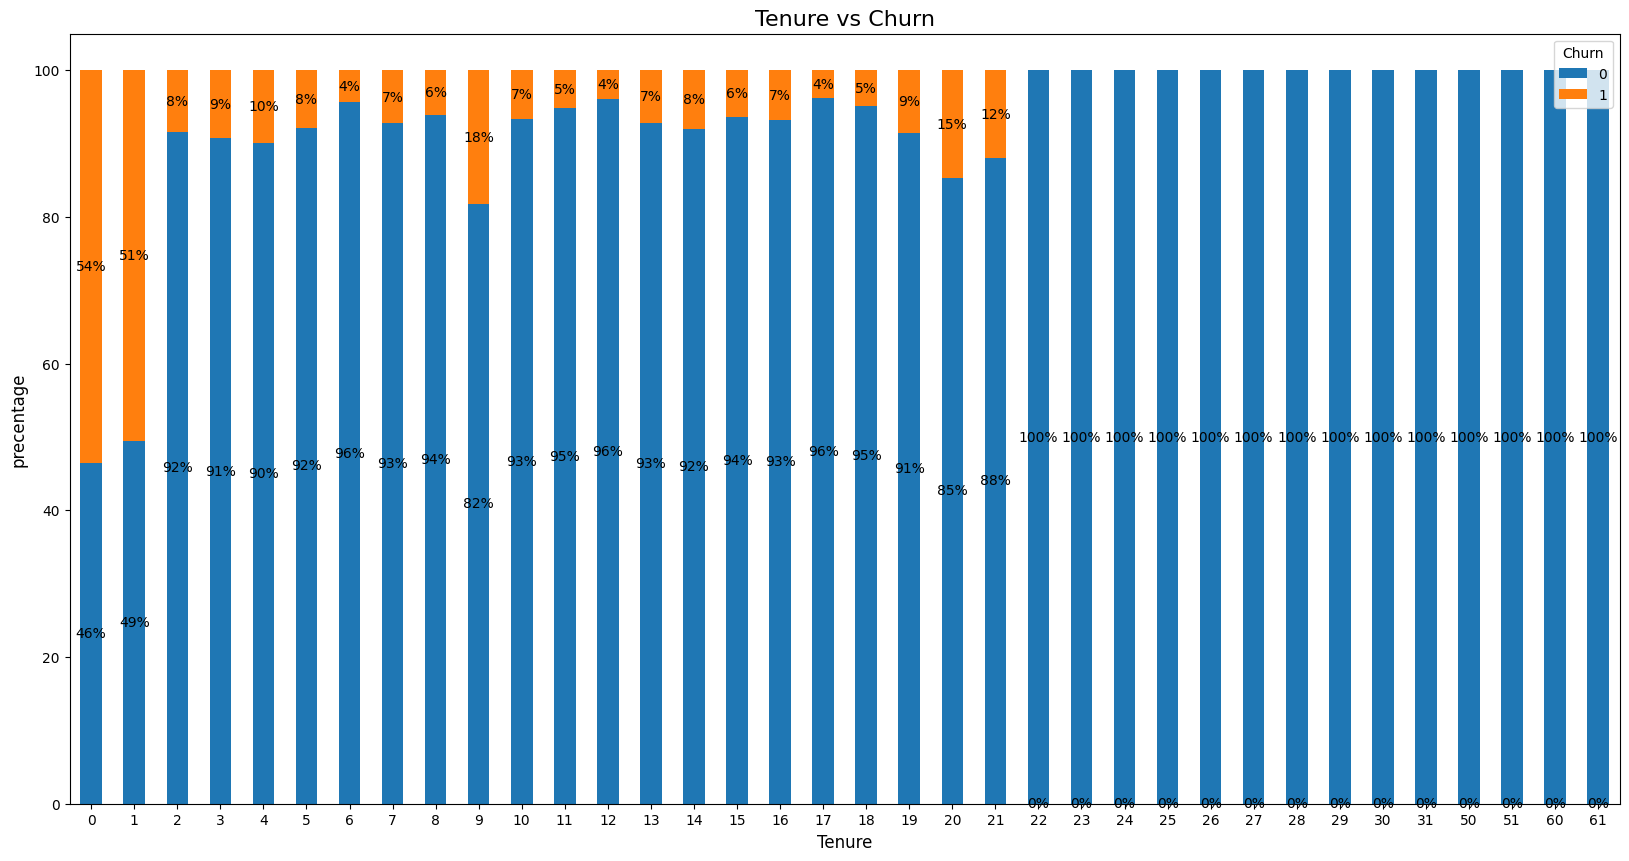

In [105]:
plt.figure(figsize=(20, 10))

pivot_tenure = pd.crosstab(index=df['Tenure'], columns=df['Churn'], normalize='index') * 100
ax = pivot_tenure.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tenure vs Churn', fontsize=16)
plt.ylabel('precentage', fontsize=12)
plt.xlabel('Tenure', fontsize=12)
plt.xticks(rotation=0)

# Anotasi
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.show()

**Insight**

- Pada stacked bar di atas, kita dapat melihat bahwa pelanggan yang baru bergabung ke dalam E-Commerce selama 0-1 bulan cenderung untuk Churn, persentase mencapai 50% ke atas. Kemudian pelanggan yang bergabung ke dalam E-Commerce selama 2-21 bulan cenderung untuk Tidak Churn, namun masih terdapat pelanggan yang Churn dengan range 4% - 18%. Hal ini mungkin disebabkan oleh cara penggunaan aplikasi yang tidak mudah dimengerti/ tidak familiar. Sehingga pelanggan menjadi tidak nyaman dan meninggalkan E-Commerce ini.
- Pelanggan yang sudah bergabung selama 22 - 61 bulan cenderung untuk Tidak Churn. Pelanggan yang menggunakan E-Commerce ini dalam waktu yang lama dimungkinkan telah memiliki kepercayaan yang tinggi. Semakin lama menggunakan, mereka juga akan lebih familiar terhadap fitur-fitur dan cara penggunaan E-Commerce ini. 

#### **WarehouseToHome vs Churn**

Berdasarkan hasil statistik kita sudah mengetahui, bahwa jarak antara gudang ke rumah pelanggan memiliki hubungan yang signifikan. Oleh karena itu, kita akan coba membahas lebih dalam terhadap data kita menggunakan visualisasi. 

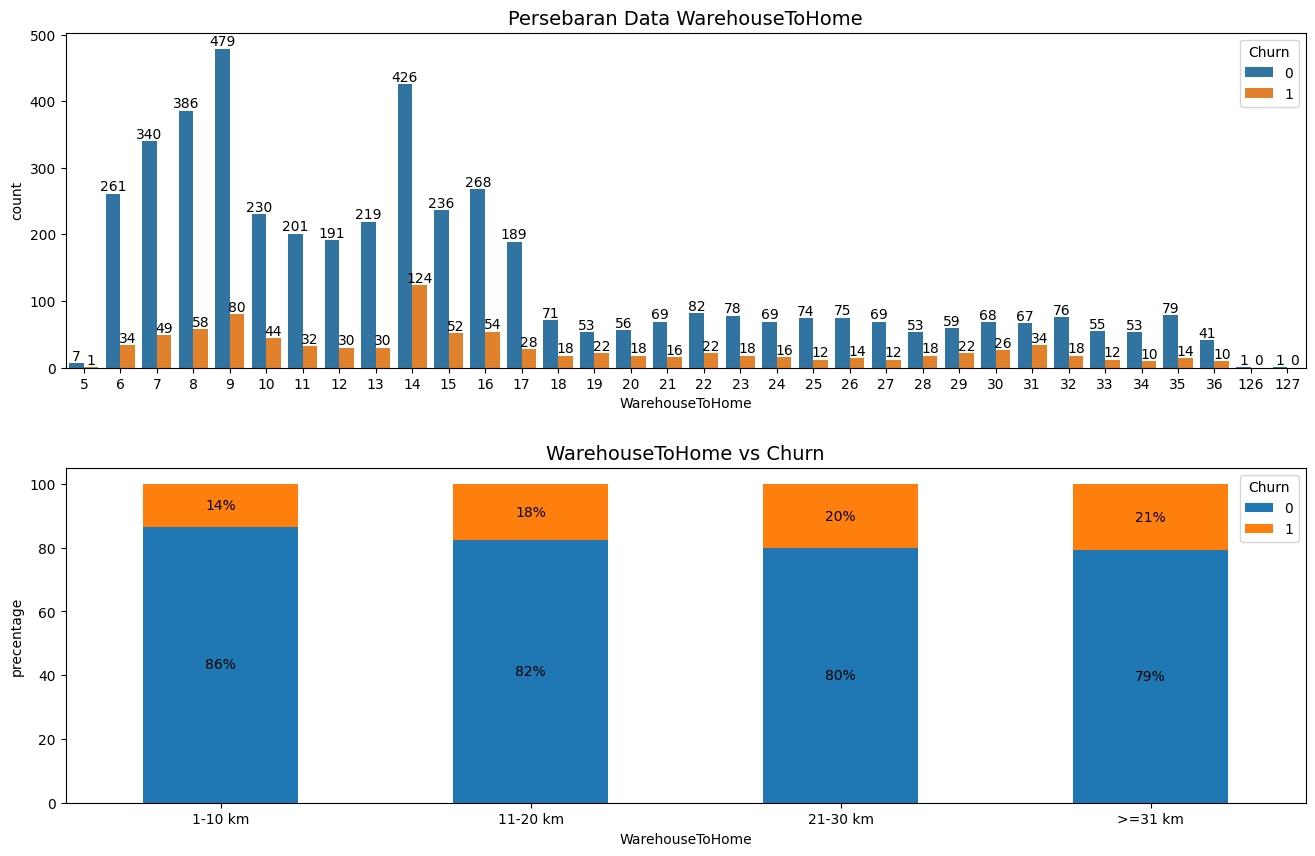

In [190]:
df_2 = df.copy()
bins = [0, 10, 20, 30, 128]
labels = ['1-10 km', '11-20 km', '21-30 km', '>=31 km']
df_2['WarehouseToHome'] = pd.cut(df_2['WarehouseToHome'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(16, 10))

# Count plot
plt.subplot(2, 1, 1)
ax1 = sns.countplot(data=df, x='WarehouseToHome', hue='Churn')
plt.title('Persebaran Data WarehouseToHome', fontsize=14)

# Anotasi untuk count plot
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Stacked bar plot 
plt.subplot(2, 1, 2)
pivot_tenure = pd.crosstab(index=df_2['WarehouseToHome'], columns=df_2['Churn'], normalize='index') * 100
ax = pivot_tenure.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('WarehouseToHome vs Churn', fontsize=14)
plt.ylabel('precentage')
plt.xticks(rotation=0)

# Anotasi
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

# Memberikan jarak antara dua subplot
plt.subplots_adjust(hspace=0.3)

plt.show()

**Insight**

- Kita memiliki data dengan range jarak 5 - 128 km, agar lebih mudah dianalisa maka kami akan melakukan data binning dengan membuat jarak per 10 km dan lebih dari sama dengan 30 km. Selain itu kita dapat melihat bahwa peresebaran data di tiap jaraknya tidak sama/ seimbang, sehingga kami akan melihatnya dalam persentase. Hal tersebut dilakukan agar data disetiap jarak memiliki proporsi yang sama/ seimbang. 
-  Dapat kita lihat di Grafik ke-2 (stacked bar) WarehouseToHome vs Churn, ternyata pelanggan yang memiliki jarak 21-30 km & >= 31 km memiliki potensi Churn yang lebih besar 20% dan 21% . Sedangkan pelanggan yang memiliki jarak 1-10 km dari gudang memiliki persentasi Churn yang rendah 14%. Hal tersebut bisa disebabkan karena pelanggan yang memiliki jarak jauh dengan gudang, barang yang diorder akan lebih lama sampai dibandingkan dengan pelanggan yang memiliki jarak dekat. Selain itu jarak yang jauh juga membuat ongkos kirim yang ditanggung pelanggan semakin besar. Sehingga menyebabkan ketidakpuasan pelanggan dalam melakukan pembelian di E-Commerce ini dan menyebabkan pelanggan Churn.

#### **NumberOfDeviceRegistered & NumberOfAddress vs Churn**

Berdasarkan hasil tes statistik jumlah device & alamat yang terdaftar di E-Commerce ini memiliki hubungan signifikan dengan Churn. Sebelumnya kita tidak mengetahui manakah pelanggan yang berpotensi Churn, maka dari itu, kami akan mecoba membahas lebih detail.

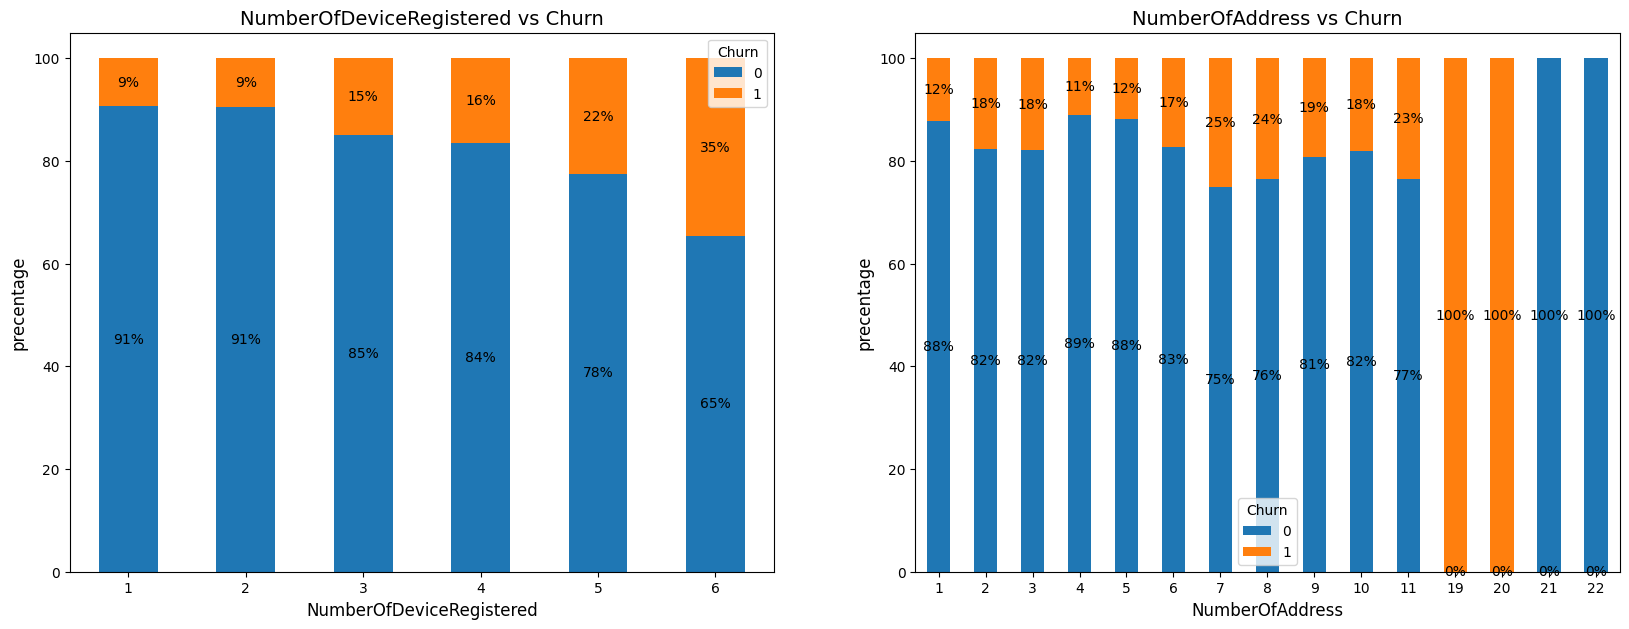

In [80]:
plt.figure(figsize=(20, 7))

# Stacked bar plot NumberOfDeviceRegistered
plt.subplot(1, 2, 1)
pivot_tenure = pd.crosstab(index=df['NumberOfDeviceRegistered'], columns=df['Churn'], normalize='index') * 100
ax = pivot_tenure.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('NumberOfDeviceRegistered vs Churn', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('precentage', fontsize=12)
plt.xlabel('NumberOfDeviceRegistered', fontsize=12)

# Anotasi
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

# Stacked bar plot NumberOfAddress
plt.subplot(1, 2, 2)
pivot_tenure = pd.crosstab(index=df['NumberOfAddress'], columns=df['Churn'], normalize='index') * 100
ax = pivot_tenure.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('NumberOfAddress vs Churn', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('precentage', fontsize=12)
plt.xlabel('NumberOfAddress', fontsize=12)

# Anotasi
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.show()

**Insight**

- Pada grafik NumberofDevice, kita dapat melihat bahwa pelanggan yang mendaftarkan banyak device ke plaftrom E-Commerce ini justru pelanggan akan cenderung Churn. Sedangkan pelanggan yang mendaftarkan E-Commerce ini hanya ke 1 atau 2 device cenderung untuk tidak Churn. Hal tersebut mungkin dapat disebabkan karena pelanggan yang login menggunakan banyak device perlu mengingat berbagai macam informasi login, seperti alamat email, kata sandi, dan kode verifikasi. Hal ini dapat membuat pelanggan merasa kesulitan, sehingga mereka lebih mungkin untuk berhenti menggunakan e-commerce ini. 
- Pada grafik NumberofAddress, kita dapat melihat bahwa grafiknya fluktuatif. Sehingga kita dapat menyimpulkan bahwa semua pelanggan, baik yang mendaftarkan banyak alamat maupun sedikit ada yang Churn, namun tingkat Churn dalam setiap alamat yang ditambahkan berbeda-beda. Tingkat Churn yang paling rendah berada pada pelanggan yang mendaftarkan 21 - 24 alamat, sebesar 0%. Sedangkan tingkat Churn yang paling tinggi berada pada pelanggan yang mendaftarkan 19 - 20 alamat, sebesar 100%

#### **DaySinceLastOrder vs Churn**

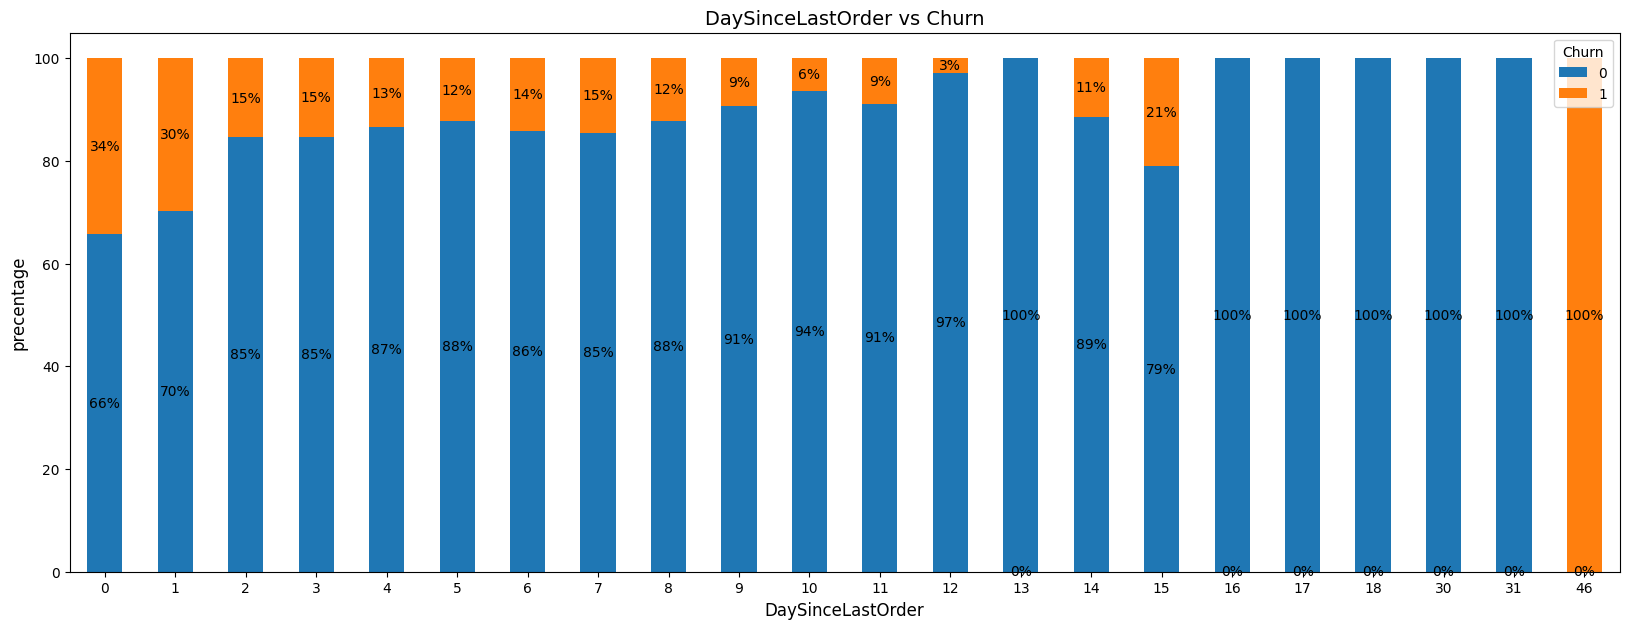

In [188]:
plt.figure(figsize=(20, 7))

# Stacked bar plot 
pivot_tenure = pd.crosstab(index=df['DaySinceLastOrder'], columns=df['Churn'], normalize='index') * 100
ax = pivot_tenure.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('DaySinceLastOrder vs Churn', fontsize=14)
plt.ylabel('precentage', fontsize=12)
plt.xlabel('DaySinceLastOrder', fontsize=12)
plt.xticks(rotation=0)

# Anotasi
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

# Memberikan jarak antara dua subplot
plt.subplots_adjust(hspace=0.3)

plt.show()

**Insight**

DaySinceLastOrder merupakan tanggal terakhir pelanggan melakukan Order, sehingga kita asumsikan data ini diambil di akhir bulan. Sehingga data 0 adalah akhir bulan, data 31 adalah awal bulan, dan data 46 adalah orang yang melakukan order lebih dari satu bulan ke belakang sehingga masuk di tengah bulan. Berdasarkan grafik di atas, kita dapat melihat bahwa pelanggan yang melakukan Order di awal bulan sampai pertengahan bulan cenderung untuk tidak Churn. Sedangkan pelanggan yang melakukan order dari tengah hingga ke akhir bulan lebih cenderung Churn. Pelanggan yang melakukan oder pada tanggal 29-31 memiliki potensi Chrun yang lebih besar dibandingkan dengan tanggal lainnya, yaitu 30 % - 34 %. Hal tersebut dimungkinkan karena banyak pelanggan yang menerima gaji di akhir atau awal bulan, sehingga kemungkinan mereka memiliki lebih banyak dana untuk melakukan order. Dimungkinkan juga perusahaan ini lebih memberikan lebih banyak diskon di awal bulan, sehingga pelanggan cenderung terdorong untuk melakukan transaksi dan merasa puas atas diskonnya. 

#### **OrderCount vs Churn**

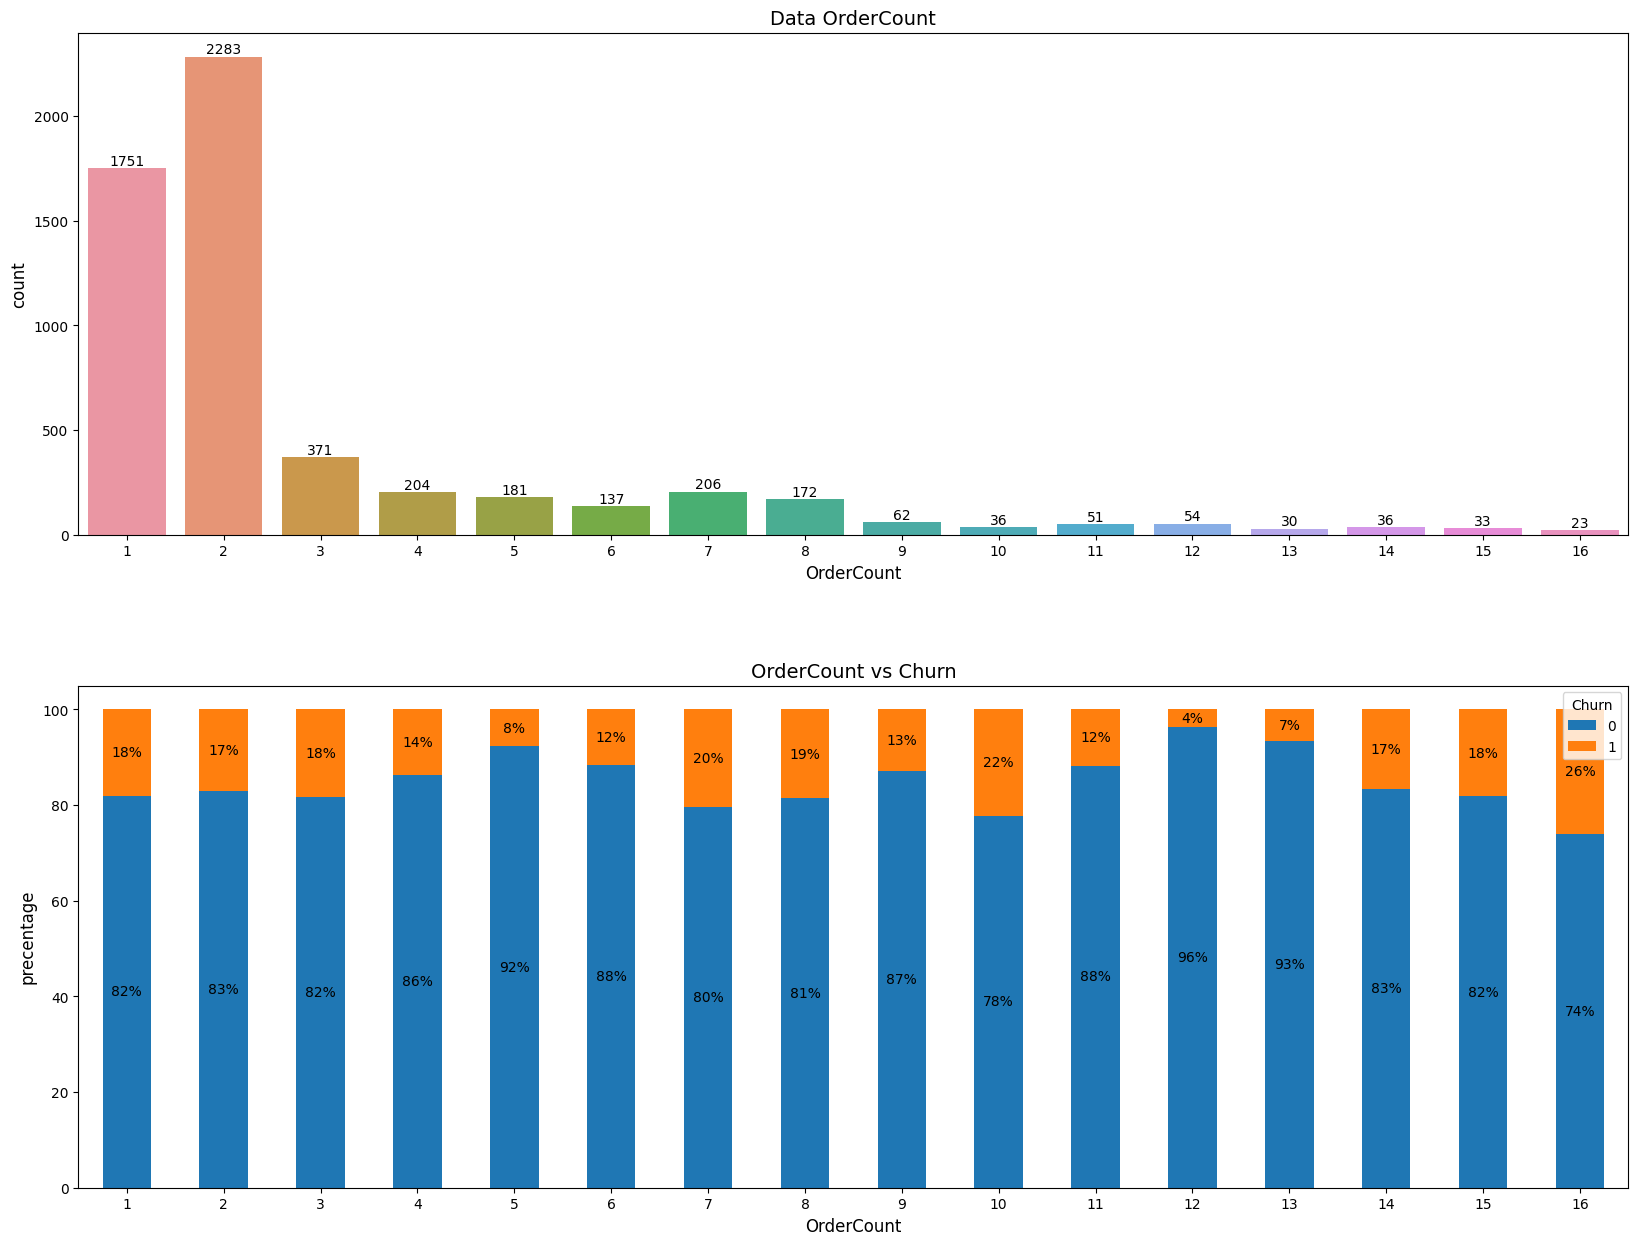

In [185]:
plt.figure(figsize=(20, 15))

# Count plot
plt.subplot(2, 1, 1)
ax1 = sns.countplot(data=df, x='OrderCount')
plt.title('Data OrderCount', fontsize=14)
plt.ylabel('count', fontsize=12)
plt.xlabel('OrderCount', fontsize=12)

# Anotasi untuk count plot
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Stacked bar plot 
plt.subplot(2, 1, 2)
pivot_tenure = pd.crosstab(index=df['OrderCount'], columns=df['Churn'], normalize='index') * 100
ax = pivot_tenure.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('OrderCount vs Churn', fontsize=14)
plt.ylabel('precentage', fontsize=12)
plt.xlabel('OrderCount', fontsize=12)
plt.xticks(rotation=0)

# Anotasi
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

# Memberikan jarak antara dua subplot
plt.subplots_adjust(hspace=0.3)

plt.show()

**Insight**
- Pada gafik pertama (Data OrderCount) , kita dapat melihat bahwa pelanggan di E-Commerce ini cenderung sedikit melakukan order. Order yang dilakukan oleh pelanggan kebanyakan hanya 2 saja.
- Selanjutnya pada grafik kedua (OrderCount vs Churn), kita dapat melihat bahwa persentase Churn yang paling besar berada pada pelanggan yang 16 kali melakukan order, sebesar 26%. Sedangkan persentase Churn yang paling kecil berada pada pelanggan yang melakukan 4 kali melakukan order, sebesar 4%. Namun, jika dilihat secara keseluruhan grafik di atas terlihat fluktuatif. Pelanggan yang melakukan order dengan jumlah kecil belum tentu akan Churn, begitu juga sebaliknya.  

#### **CashbackAmount vs Churn**

Hasil tes statistik menunjukkan adanya hubungan signifikan antara jumlah Cashback yang diterima pelanggan dengan Churn. Maka dari itu kami akan coba memahas lebih dalam menggunakan visualisasi. Sebelumnya kita telah mengetahui bahwa kita memiliki data Cashback amount dengan nilai minimal 0 dan nilai maksimal 325, sehingga kita akan melakukan binning. Binning yang dilakukan dengan memberikan interval 50 Rupee pada setiap kategorinya.

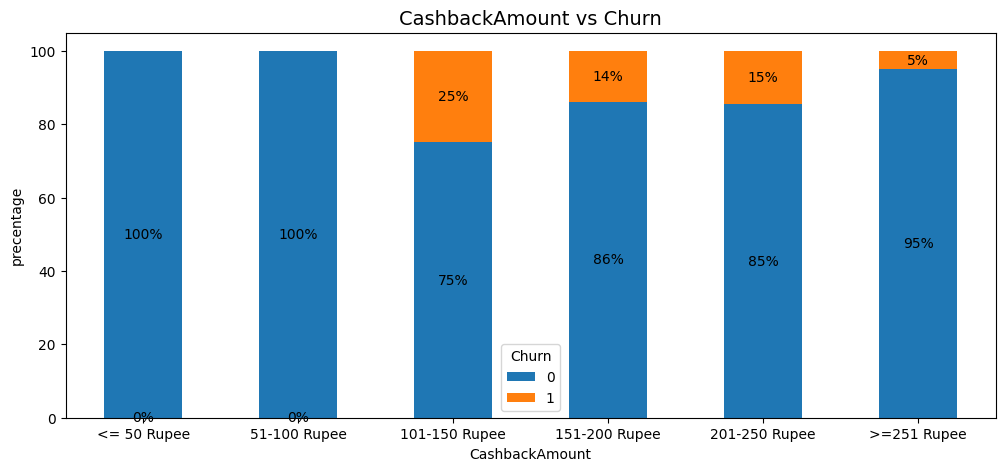

In [174]:
df_2 = df.copy()
bins = [0, 51, 101, 151, 201, 251, 326]
labels = ['<= 50 Rupee', '51-100 Rupee','101-150 Rupee', '151-200 Rupee', '201-250 Rupee', '>=251 Rupee']
df_2['CashbackAmount'] = pd.cut(df_2['CashbackAmount'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 5))

# Stacked bar plot 
pivot_tenure = pd.crosstab(index=df_2['CashbackAmount'], columns=df_2['Churn'], normalize='index') * 100
ax = pivot_tenure.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('CashbackAmount vs Churn', fontsize=14)
plt.ylabel('precentage')
plt.xticks(rotation=0)

# Anotasi
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

# Memberikan jarak antara dua subplot
plt.subplots_adjust(hspace=0.3)

plt.show()

**Insight**

Berdasarkan grafik di atas, kita dapat mengetahui bahwa pelanggan yang tidak mendapat cashback sampai mendapatkan cashback 100 Rupee cenderung untuk tidak Churn. Sedangkan pelanggan yang mendapatkan Cashback hanya 101-150 Rupee memiliki persentase Churn yang paling tinggi sebesar 25%. Namun setelah dilakukan pengecekan, data pelanggan yang mendapatkan cashback 0 - 100 Rupee hanya 12. Sehingga kita tidak dapat langsung menyimpulkan bahwa pelanggan yang sedikit mendapatkan Cashback cenderung untuk tidak Churn. Sedangkan data pelanggan yang mendapatkan 101 sampai >= 251 Rupee berjumlah 5618, sehingga kita akan mengambil kesimpulan dari data pelanggan tersebut. Pelanggan yang cenderung Churn adalah pelanggan yang mendapatkan sedikit Cashback, sedangkan pelanggan yang Tidak Churn mendapatkan banyak Cashback.

### **4. Churn vs Data Kategorikal**

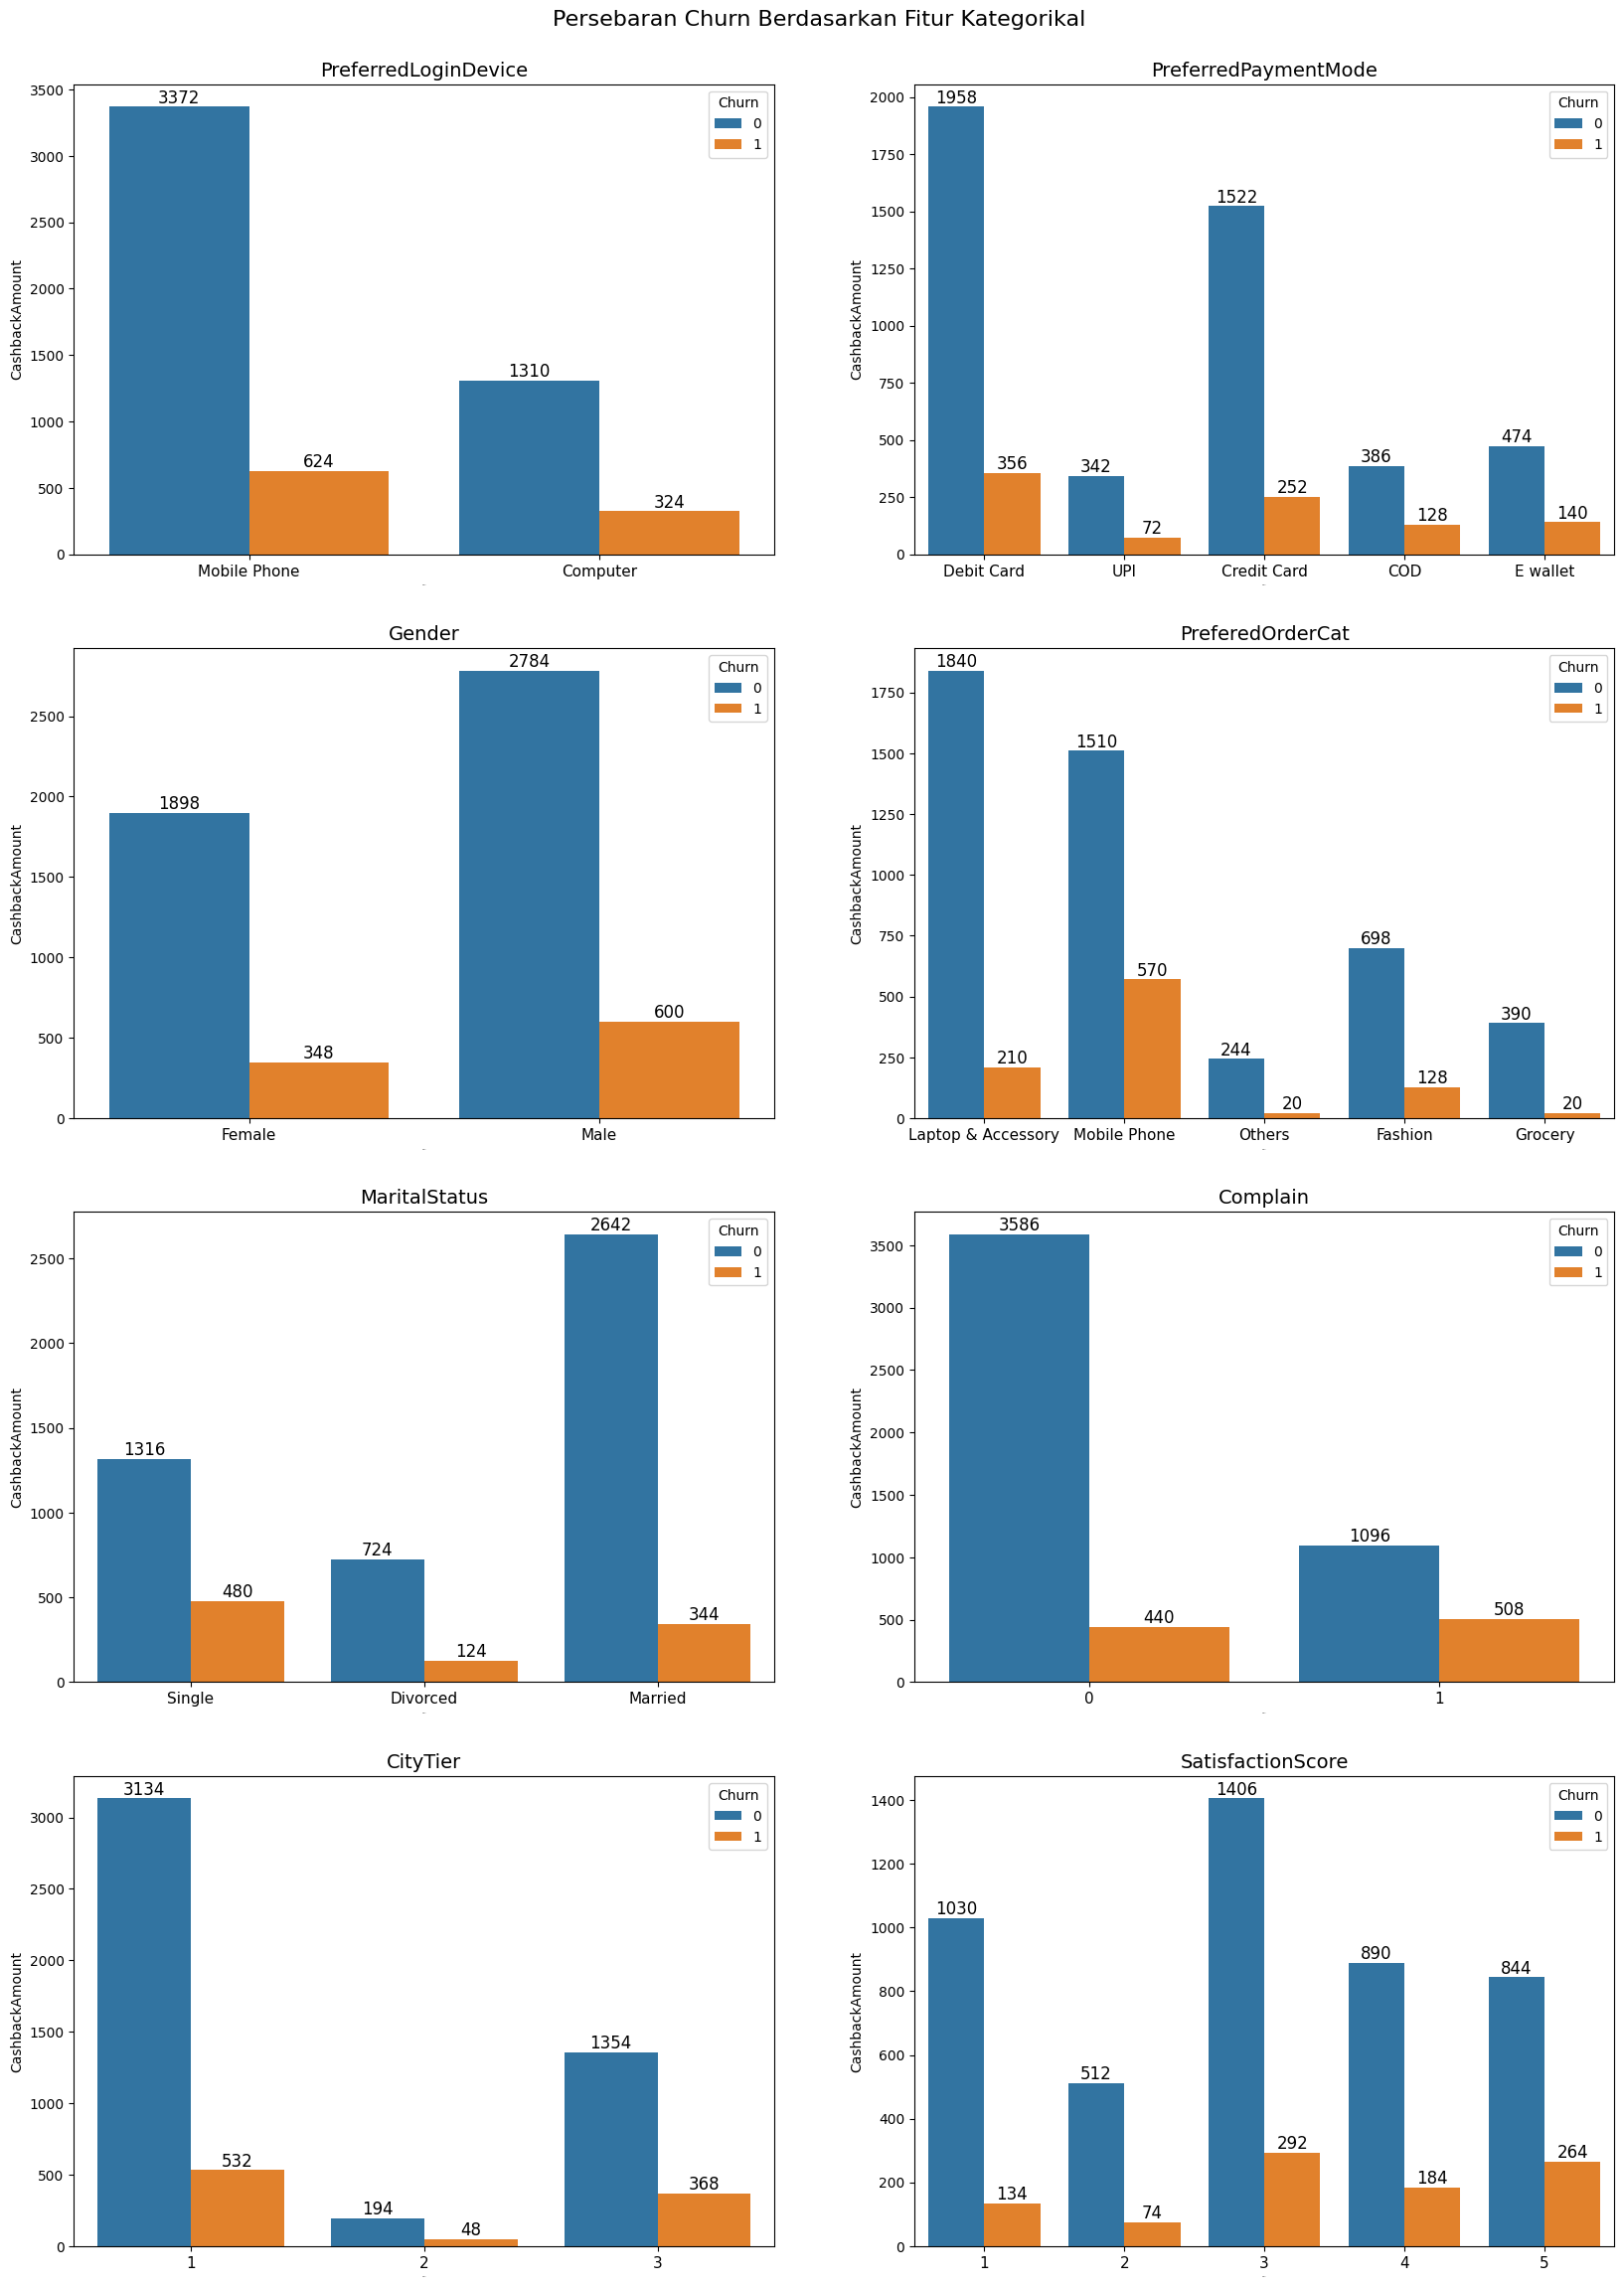

In [82]:
cat_feature = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain', 'CityTier','SatisfactionScore']

plt.figure(figsize=(20, 25))
subplot = 1

for cat in cat_feature:
    plt.subplot(4, 2, subplot)
    ax = sns.countplot(data=df, x=cat, hue='Churn')
    
    # Anotasi
    total_count = len(df[cat])
    for p in ax.patches:
        count_value = int(p.get_height())
        x_position = p.get_x() + p.get_width() / 2
        y_position = p.get_height()
        ax.annotate(f'{count_value}', (x_position, y_position), ha='center', va='bottom', fontsize=12)
    
    plt.xlabel('Churn', fontsize=1)
    plt.ylabel(i,fontsize=10)
    plt.title(cat, fontsize=14)
    
    # Menyesuaikan ukuran font pada sumbu x
    plt.tick_params(axis='x', labelsize=1)

    # Menonaktifkan rotasi pada sumbu x
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
    
    subplot += 1

plt.suptitle('Persebaran Churn Berdasarkan Fitur Kategorikal', y=1.01, fontsize=16)
plt.subplots_adjust(top=0.98)
plt.show()


**Insight**

Terlihat dari grafik Persebaran Churn di atas, total jumlah unique disetiap data kategori tidak sama/ tidak seimbang. Sehingga kita tidak dapat langsung menyimpulkan bahwa jumlah Churn yang paling banyak berada disalah satu kategori saja. Oleh karena itu kita perlu membuat datanya seimbang terlebih dahulu, caranya dengan menganggap bahwa data fitur disetiap unique adalah 100%. Setelah itu barulah kita dapat melihat data apa saja yang lebih banyak Churn.

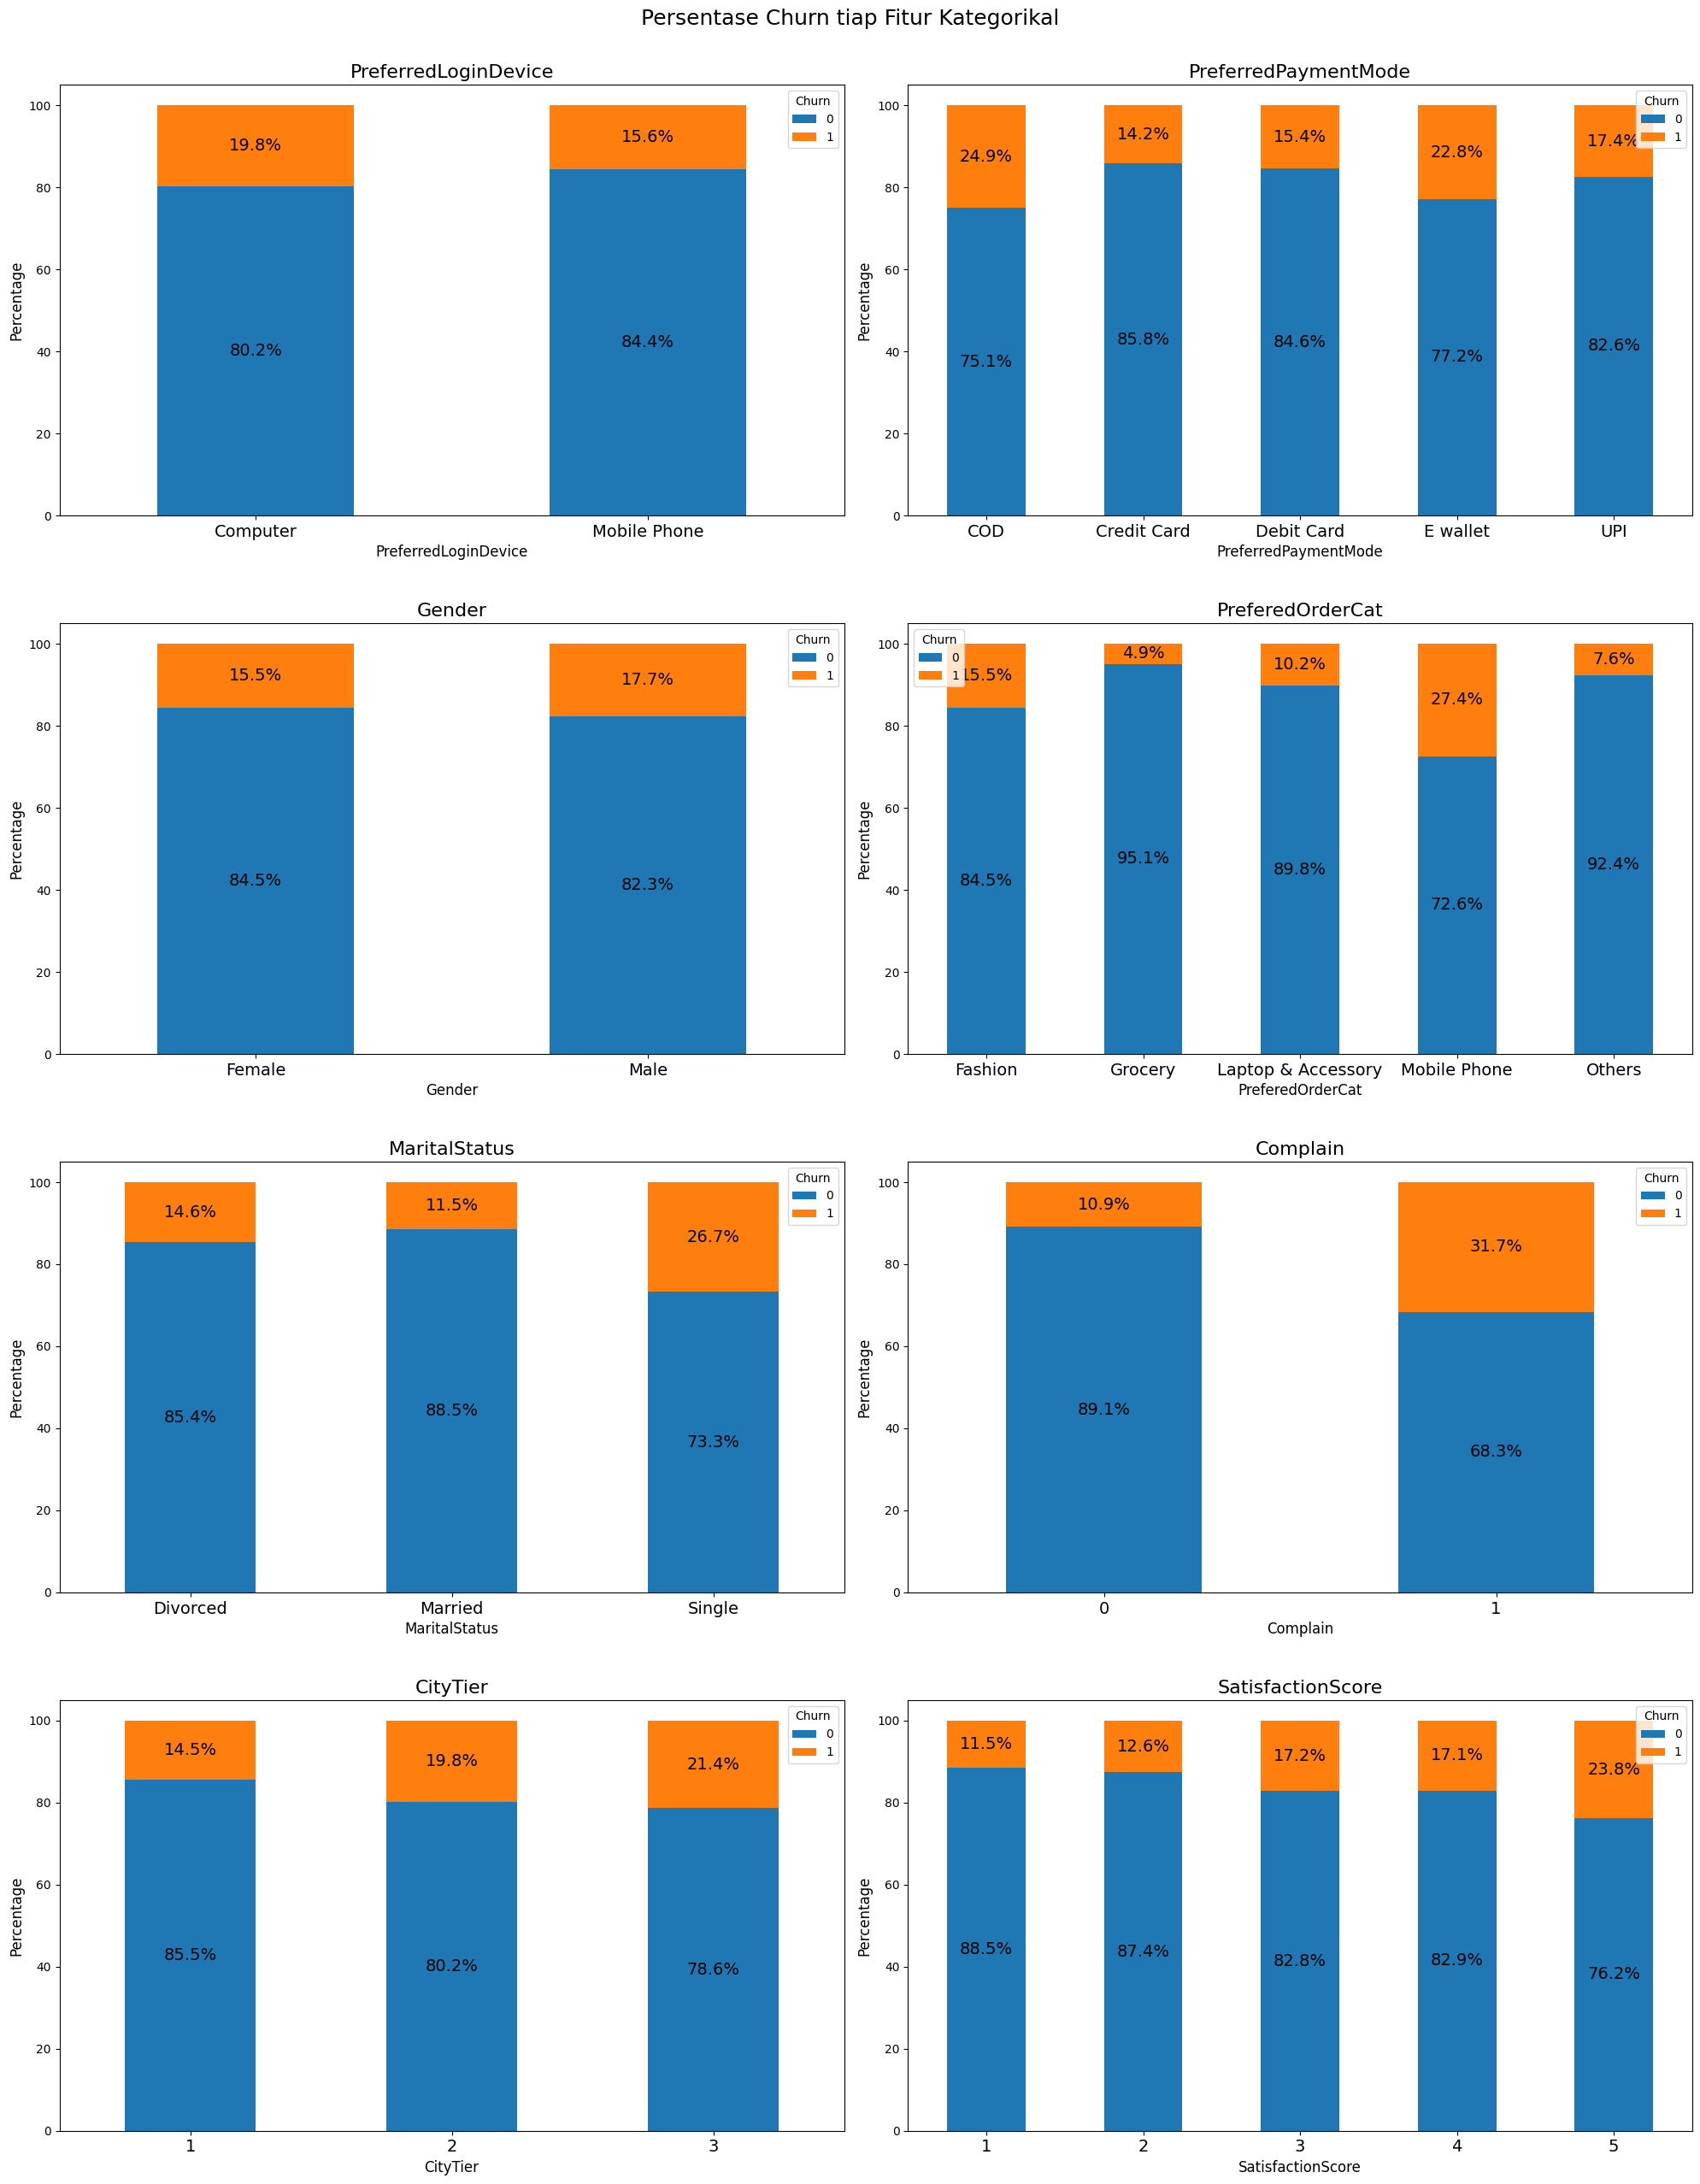

In [83]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))
axes = axes.flatten()

for i, feature in enumerate(cat_feature):
    # Membuat crosstab dengan nilai dalam bentuk persentase
    pivot_feature_percent = pd.crosstab(index=df[feature], columns=df['Churn'], normalize='index') * 100
    
    # Membuat bar chart pada subplot yang sesuai
    ax = pivot_feature_percent.plot(kind='bar', stacked=True, ax=axes[i])
    
    # Menambahkan label dan judul
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Percentage', fontsize=12)
    ax.set_title(feature, fontsize=16)
    
    # Menambahkan anotasi pada setiap bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=14)
    
    # Menonaktifkan rotasi pada sumbu x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)


# Menampilkan plot dengan jarak antar subplot
plt.tight_layout()
plt.subplots_adjust(hspace=0.25)  
plt.suptitle('Persentase Churn tiap Fitur Kategorikal', y=1.02, fontsize=18)
plt.show()

**Insight**
- Pelanggan yang mengakses aplikasi e-commerce ini menggunakan Computer lebih banyak yang Churn 19.8% dibandingkan dengan menggunakan Mobile Phone 15.6%. Namun perbedaan persentase Churn antara keduanya tidak berbeda jauh. Hal ini dapat disebabkan karena tampilan dan cara akses aplikasinya lebih mudah dilakukan di Mobile Phone dibandingkan dengan Computer.
- Metode pembayaran dengan COD ternyata memiliki nilai Churn yang paling tinggi 24.9% dibandingkan dengan metode pembayaran lainnya. Kemudian metode pembayaran menggunakan Credit Card memiliki nilai Churn yang paling rendah, yaitu sebesar 14.2%. Hal tersebut dapat disebabkan karena ketidakpuasan pelanggan dalam fitur COD. Hal ini dapat ditelusuri lebih jauh oleh perusahaan E-Commerce ini, apakah pelayanan COD yang dilakukan sudah cukup baik/ masih terdapat yang harus diperbaiki?
- Pelanggan laki-laki lebih banyak Churn 17.7% dibandingkan dengan pelanggan perempuan  15.5%. Namun perbedaan persentase Churn antara keduanya tidak berbeda jauh.
- Produk yang paling banyak memiliki pelanggan Churn adalah Mobile Phone 27.4% dibanding dengan produk lainnya. Kemudian yang paling sedikit pelanggan yang Chrun berada pada produk Grocery 4.9%.
- Pelanggan dengan status pernikahan Single paling banyak Churn 26.7%. Status single, didominasi oleh orang dengan usia muda dan merekalah yang paling mahir terhadap teknologi. Kemudian orang di usia muda juga cenderung menggunakan lebih dari satu platform E-commerce. Sehingga mereka akan stay pada platform yang menurut mereka paling baik. 
- Pelanggan yang pernah mengajukan Complain dalam satu bulan terakhir merupakan pelanggan yang paling banyak Churn 31.7% dibandingkan dengan yang tidak mengajukan complain 10.9%. Perbedaan nilanya sangat signifikan. Pelanggan yang mengajukan complain biasanya kurang puas dan bisa merasa kecewa terhadap E-Commerce yang mereka gunakan, maka dari itu mereka akan cenderung untuk Churn.
- Pelanggan yang berada di CityTier 1 paling sedikit mengalami Churn 14.5%. Sedangkan pelanggan yang berada di CityTier 3 paling banyak mengalami Churn 21.4%. Namun pada grafiknya kita tidak dapat melihat perbedaan yang signifikan antara tiap CityTier. Kita dapat asumsikan bahwa CityTier 3 merupakan daerah perkotaan, sehingga persaingan E-Commerce pada daerah ini sangat besar. Hal tersebut yang dapat dimungkinkan membuat pelanggan cenderung Churn. Sedangkan CityTier 1 dapat kita asumsikan daerah pedesaan, pelanggannya cenderung untuk Tidak Churn dikarenakan persaingan E-Commerce pada daerah pedesaan cenderung sedikit.
- Pelanggan yang memberikan nilai 5 pada SatisficationScore justru lebih banyak Churn dibandingkan dengan yang lainnya, sebesar 23.8%. Pelanggan yang memberikan nilai 1 pada SatisficationScore merupakan pelanggan yang paling sedikit Churn 11.5%. Data ini menunjukkan adanya anomali, dikarenakan biasanya pelanggan yang cenderung Churn nilai satisfactionScore seharusnya yang lebih rendah. Namun, perusahaan dapat mempelajari lebih lanjut apakah pelanggan benar-benar sudah puas pada E-Commerce kita atau belum? Selain itu dimungkinkan pelanggan hanya asal memilih saja saat diminta memberi rating.

Selanjutnya kita akan coba mencari tahu lebih dalam fitur kategorikal apa saja yang memiliki pengaruh terhadap Chrun menggunakan uji statistik. Tes statistik yang akan kami gunakan adalah Chi-Squared, yaitu menguji keterikatan / independecy antara 2 variabel kategorik. Pada kasus ini kita hendak menguji apakah ada keterkaitan tiap fitur numerik terhadap pelanggan yang Tidak Churn (0) dan Churn(1).<br>
Ho (Hipotesis Nol): Tidak ada keterkaitan statistik yang signifikan antara fitur kategorikal dengan Churn.<br>
Ha (Hipotesis Alternatif): Ada keterkaitan statistik yang signifikan antara setidaknya satu fitur kategorikal dengan Churn. 

In [147]:
from scipy.stats import chi2_contingency

df_cat = df[['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain', 'CityTier', 'SatisfactionScore', 'Churn']]

chi_data = []

for i in df_cat.columns[:-1]:  # Exclude the 'Churn' column
    contingency_table = pd.crosstab(index= df_cat['Churn'], columns=df_cat[i])
    stat, pvalue, dof, expected = chi2_contingency(contingency_table)

    # Menambahkan data ke list
    chi_data.append({'Variables': i, 'Chi-Squared Pvalue': pvalue})

# Membuat DataFrame dari list
chi_df = pd.DataFrame(chi_data)

# Menambahkan kolom baru berdasarkan kondisi p-value
chi_df['Hypothesis Test Result'] = chi_df['Chi-Squared Pvalue'].apply(lambda x: 'Tolak Ho' if x <= 0.05 else 'Gagal Menolak Ho')

chi_df


,Variables,Chi-Squared Pvalue,Hypothesis Test Result
0,PreferredLoginDevice,1.477040e-04,Tolak Ho
1,PreferredPaymentMode,1.497857e-10,Tolak Ho
2,Gender,3.082094e-02,Tolak Ho
3,PreferedOrderCat,3.119243e-61,Tolak Ho
4,MaritalStatus,1.073011e-41,Tolak Ho
5,Complain,2.664461e-78,Tolak Ho
6,CityTier,1.261200e-09,Tolak Ho
7,SatisfactionScore,2.423335e-14,Tolak Ho


Hasil tes statistik Chi-Squared dari seluruh fitur kategorik yang kita miliki adalah Tolak Ho. Artinya, kita memiliki bukti yang cukup untuk menyatakan bahwa setidaknya satu unique dari setiap fitur kategorikal tersebut memiliki hubungan yang signifikan dengan Churn.

# **Machine Learning Model**

Karena datanya sudah kita bersihkan di tahap Data Cleaning, kita akan lanjut ke tahap modeling.

In [84]:
# libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# train test split
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler

# cross-validation
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, fbeta_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# feature selection
from sklearn.feature_selection import SelectKBest

# visualisation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as imb_Pipeline

# exporting model
import pickle

### **1. Define X (Feature) and y (Target)**
Kita akan membuat sebuah model yang akan memprediksi apakah customer akan churn atau stay berdasarkan data yang telah diberikan. <br>
Target: Churn<br>
Feature: Semua kolom lain kecuali CustomerID

In [85]:
x = df.drop(columns=['CustomerID','Churn'])
y = df['Churn']
display(x.head(),y.head())

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,121
2,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
3,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
4,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,130


0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

### **2. Train-test Split**
Data kita akan displit menjadi **training set** (80% dari dataset) dan **test set.** (20% dari dataset)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=42,
    test_size=0.2,
    stratify=y
)

### **3. Preprocessing**
Untuk modeling, semua data categorical perlu kita konversi menjadi data numerikal, menggunakan encoding.<br>
Semua data numerikal juga akan kita scaling untuk meningkatkan akurasi model kita.

In [87]:
# kolom kategorikal
for column in x.describe(include='object').columns:
    values = df[column].unique()
    print(f'{column}: {values}')

PreferredLoginDevice: ['Mobile Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


In [88]:
# kolom numerikal
x.describe(include=['float','int']).columns

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

**Encoding**
- OneHotEncoder: PreferredLoginDevice, Gender, MaritalStatus
    - Kita gunakan OneHotEncoder karena terdapat sedikit unique values (2-3) untuk kolom tersebut.
- BinaryEncoder: PreferredPaymentMode, PreferedOrderCat
    - Kita gunakan BinaryEncoder karena terdapat banyak unique values (5) untuk kedua kolom tersebut.

**Scaling**
- RobustScaler: semua kolom numerikal, kecuali CityTier dan Complain
    - CityTier dan Complain merupakan kolom kategorikal yang ordinal. Tidak perlu discale.
    - Kita gunakan RobustScaler karena semua data numerik yang kita gunakan bersifat tidak normal.

In [89]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['PreferredLoginDevice','Gender','MaritalStatus']),
    ('binary', BinaryEncoder(), ['PreferredPaymentMode','PreferedOrderCat']),
    ('robust', RobustScaler(), ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered',
                                'NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount',
                                'DaySinceLastOrder','CashbackAmount'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['PreferredLoginDevice', 'Gender',
                                  'MaritalStatus']),
                                ('binary', BinaryEncoder(),
                                 ['PreferredPaymentMode', 'PreferedOrderCat']),
                                ('robust', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'OrderAmountHikeFromlastYear', 'CouponUsed',
                                  'OrderCount', 'DaySinceLastOrder',
                                  'CashbackAmount'])])

### **4. Cross Validation**
Ada beberapa algorithm yang bisa kita gunakan untuk model kita. <br>
Kita akan menguji semua algorithm ini dan memilih yang terbaik untuk model kita. <br>
Beberapa model yang akan kita gunakan:
1. LogisticRegression
2. DecisionTreeClassifier
3. KNeighborsClassifier
4. Ensemble Models:
    - VotingClassifier
    - StackingClassifier
    - BaggingClassifier
    - RandomForestClassifier
    - AdaBoostClassifier
    - XGBoostClassifier
    - GradientBoostingClassifier

In [90]:
# algorithms
# base models
logreg = LogisticRegression(random_state=42)
tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

# ensemble models
voting = VotingClassifier([('logreg',logreg), ('tree',tree), ('knn',knn)])
stacking = StackingClassifier([('logreg',logreg), ('tree',tree), ('knn',knn)], final_estimator=logreg)
bagging = BaggingClassifier(random_state=42, base_estimator=knn)
rf = RandomForestClassifier(random_state=42)
adb = AdaBoostClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier()

In [107]:
# cross validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
list_model = [logreg, knn, tree, voting, stacking, bagging, rf, adb, gboost, xgb]
cv_mean = []
cv_std = []
cv_all = []
f2 = make_scorer(fbeta_score, beta=2)

for model in list_model:
    model_pipe = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    model_cv = cross_val_score(estimator = model_pipe,
                               X = x_train,
                               y = y_train,
                               cv = skfold,
                               scoring = f2
                               )
    
    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(2))
    
df_cv = pd.DataFrame({
    'models':['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'Voting', 'Stacking', 'Bagging', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'XGBClassifier'],
    'mean':cv_mean,
    'std':cv_std,
    'all_cv':cv_all
})

df_cv.sort_values('mean', ascending=False)

,models,mean,std,all_cv
9,XGBClassifier,0.848725,0.016846,"[0.87, 0.86, 0.84, 0.83, 0.84]"
4,Stacking,0.802112,0.027653,"[0.84, 0.83, 0.76, 0.79, 0.79]"
2,DecisionTreeClassifier,0.797781,0.019259,"[0.81, 0.83, 0.78, 0.8, 0.77]"
6,RandomForestClassifier,0.772956,0.046430,"[0.8, 0.8, 0.69, 0.82, 0.75]"
3,Voting,0.654490,0.026273,"[0.66, 0.62, 0.64, 0.7, 0.65]"
8,GradientBoostingClassifier,0.647749,0.054854,"[0.64, 0.67, 0.55, 0.7, 0.69]"
7,AdaBoostClassifier,0.602836,0.046616,"[0.61, 0.63, 0.51, 0.65, 0.62]"
0,LogisticRegression,0.549966,0.053148,"[0.55, 0.51, 0.48, 0.64, 0.56]"
1,KNeighborsClassifier,0.520051,0.019124,"[0.52, 0.53, 0.54, 0.53, 0.48]"
5,Bagging,0.501133,0.031853,"[0.5, 0.5, 0.5, 0.55, 0.45]"


Model terbaik adalah XGBClassifier, karena:
1. Mean F2-score yang tertinggi: **0.8487%**
2. Standard deviation yang rendah: **0.0168**

### **5. Hyperparameter Tuning**
**Sebelum Tuning**

In [92]:
# modeling
model_pretuned = Pipeline([
    ('preprocessing', transformer),
    ('modeling', xgb)
])

# fitting
model_pretuned.fit(x_train, y_train)

# predicting
y_predict = model_pretuned.predict(x_test)

# metrics
f2_pretuned = fbeta_score(y_pred=y_predict, y_true=y_test, beta=2)
print(f'f2-score sebelum tuning: {f2_pretuned}')

f2-score sebelum tuning: 0.9674027339642481


**Tuning Process**

In [93]:
params = {
    'modeling__learning_rate':[0.01,0.1,0.3],
    'modeling__n_estimators':[100,500],
    'modeling__max_depth':[5,10,20],
    'modeling__min_child_weight':[2,5,10],
    'modeling__subsample':[0.5,1.0]
}
list_estimators = []

gridsearch = GridSearchCV(
    estimator = model_pretuned,
    param_grid = params,
    cv = skfold,
    n_jobs = -1,
    scoring = f2,
    verbose = 2
    )
gridsearch

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['PreferredLoginDevice',
                                                                          'Gender',
                                                                          'MaritalStatus']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferredPaymentMode',
                                                                          'PreferedOrderCat']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Ten...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'modeling__learning_rate': [0.01, 0.1, 0.3],
                         'modeling__max_depth': [5, 10, 20],
                         'modeling__min_child_weight': [2, 5, 10],
                         'modeling__n_estimators': [100, 500],
                         'modeling__subsample': [0.5, 1.0]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [94]:
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['PreferredLoginDevice',
                                                                          'Gender',
                                                                          'MaritalStatus']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferredPaymentMode',
                                                                          'PreferedOrderCat']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Ten...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'modeling__learning_rate': [0.01, 0.1, 0.3],
                         'modeling__max_depth': [5, 10, 20],
                         'modeling__min_child_weight': [2, 5, 10],
                         'modeling__n_estimators': [100, 500],
                         'modeling__subsample': [0.5, 1.0]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [95]:
gridsearch.best_params_

{'modeling__learning_rate': 0.3,
 'modeling__max_depth': 20,
 'modeling__min_child_weight': 2,
 'modeling__n_estimators': 500,
 'modeling__subsample': 1.0}

**Setelah Tuning**

In [96]:
# tuned model
model_tuned = gridsearch.best_estimator_

# fitting
model_tuned.fit(x_train, y_train)

# predicting
y_predict_2 = model_tuned.predict(x_test)

# metrics
f2_tuned = fbeta_score(y_pred=y_predict_2, y_true=y_test, beta=2)
print(f'f2-score sebelum tuning: {f2_pretuned}')
print(f'f2-score setelah tuning: {f2_tuned}')

f2-score sebelum tuning: 0.9674027339642481
f2-score setelah tuning: 0.970464135021097


**Confusion Matrix**

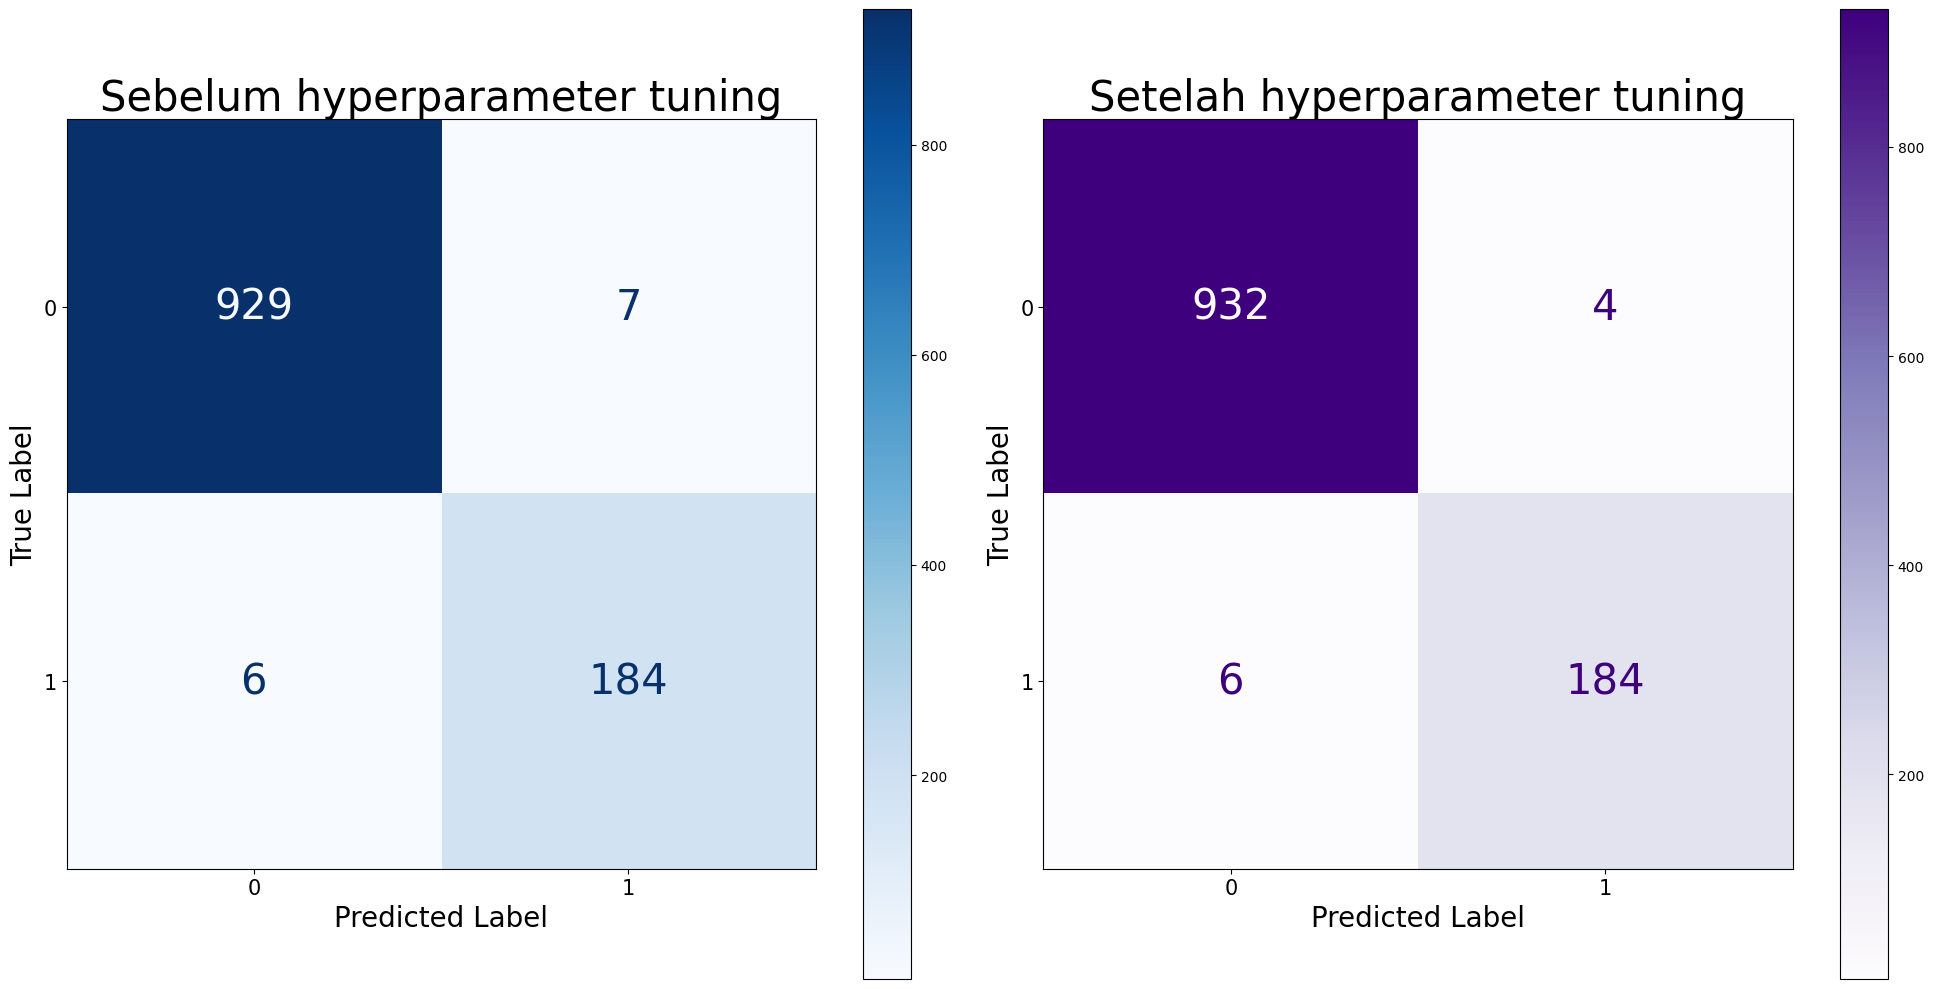

In [97]:
# Subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Sebelum tuning
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predict))
disp1.plot(ax=axes[0], cmap='Blues', text_kw={'size': 30})
axes[0].set_xlabel('Predicted Label', fontsize=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].set_ylabel('True Label', fontsize=20)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_title('Sebelum hyperparameter tuning', fontsize=30)

# Setelah tuning
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predict_2))
disp2.plot(ax=axes[1], cmap='Purples', text_kw={'size': 30})
axes[1].set_xlabel('Predicted Label', fontsize=20)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_ylabel('True Label', fontsize=20)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].set_title('Setelah hyperparameter tuning', fontsize=30)
plt.tight_layout() 
plt.show()

Ada dua confusion matrix yang ditampilkan: yang kiri merupakan model sebelum tuning, dan yang kanan merupakan model setelah tuning. <br>
Seperti yang sudah dilihat, setelah hyperparameter tuning, ada beberapa perubahan di model kita:
1. **f2-score naik dari 0.9674 ke 0.9704**
2. **ada penurunan False Positive (FP) menjadi True Negative (TN)**, dari 7 FP ke 4 FP.<br>


Maka kita akan menggunakan model yang sudah dituning.

### **6. Imbalanced Data Treatment**
Data yang kita kerjakan tidak balanced (Stay > Churn). Kita akan mencoba resampling dan melihat apakah ini bisa menaikkan performa model kita.

In [98]:
# updated model
xgb_tuned = XGBClassifier(learning_rate=0.3, max_depth=20, min_child_weight=2, n_estimators=500, subsample=1.0)

# resamplers
under = RandomUnderSampler(random_state=42)
over = RandomOverSampler(random_state=42)
nm = NearMiss(version=1, n_jobs=-1)
smt = SMOTE(random_state=42)

list_resampler = [under, over, nm, smt]
list_f2_resampler = []

for resampler in list_resampler:
    # pipeline
    pipe_resampling = imb_Pipeline([
        ('preprocessing', transformer),
        ('resampling', resampler),
        ('modeling', xgb_tuned)
    ])
    
    # fit
    pipe_resampling.fit(x_train, y_train)
    
    # predict
    y_pred_resampled = pipe_resampling.predict(x_test)
    f2_resample = fbeta_score(y_pred=y_pred_resampled, y_true=y_test, beta=2)
    
    # f1 score
    list_f2_resampler.append(f2_resample)

list_resampler.append('Tanpa resampling')
list_f2_resampler.append(f2_tuned)

df_resampler = pd.DataFrame({
    'resampler':list_resampler,
    'f2':list_f2_resampler
}).sort_values('f2', ascending=False)
df_resampler

,resampler,f2
1,RandomOverSampler(random_state=42),0.972660
4,Tanpa resampling,0.970464
3,SMOTE(random_state=42),0.939490
0,RandomUnderSampler(random_state=42),0.900383
2,NearMiss(n_jobs=-1),0.696108


**Confusion Matrix**

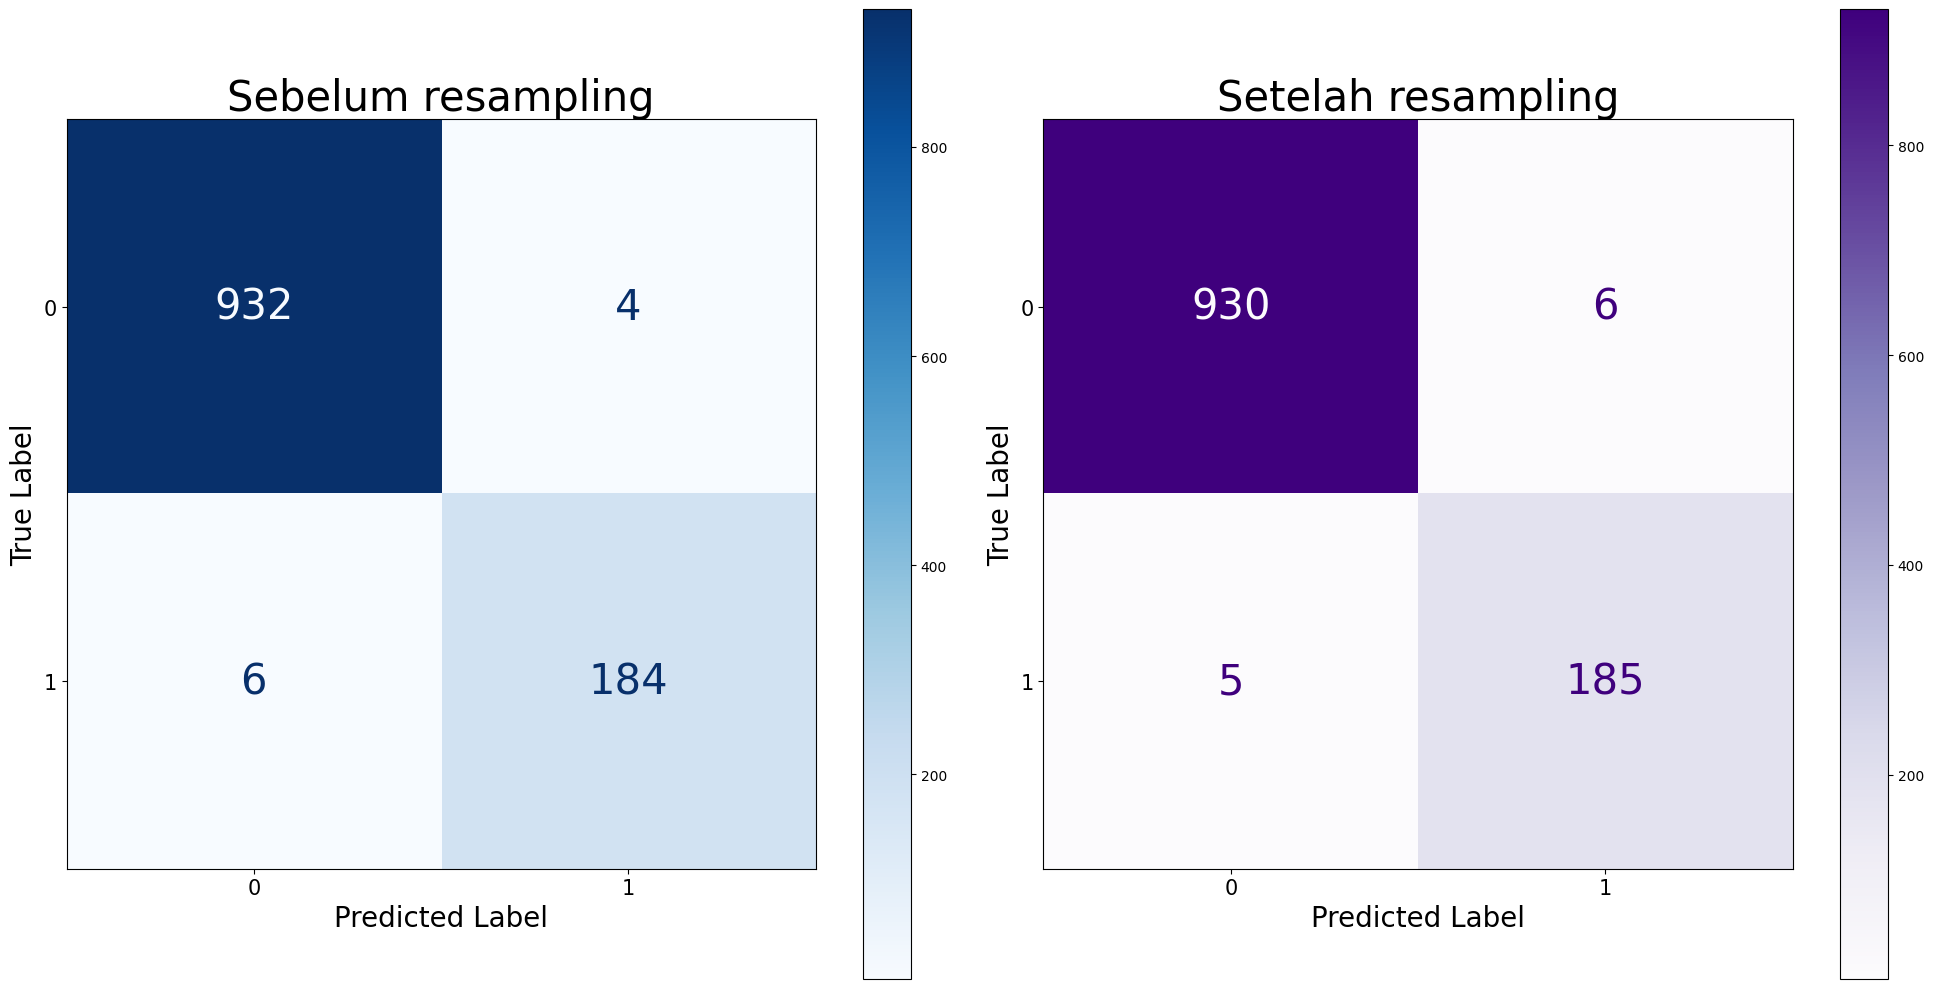

In [99]:
# oversampling model
model_oversample = imb_Pipeline([
    ('preprocessing', transformer),
    ('resampling', over),
    ('modeling', xgb_tuned)
])

# fitting
model_oversample.fit(x_train, y_train)

# predicting
y_pred_over = model_oversample.predict(x_test)

# Subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Sebelum resampling
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predict_2))
disp1.plot(ax=axes[0], cmap='Blues', text_kw={'size': 30})
axes[0].set_xlabel('Predicted Label', fontsize=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].set_ylabel('True Label', fontsize=20)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_title('Sebelum resampling', fontsize=30)

# Setelah resampling
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_over))
disp2.plot(ax=axes[1], cmap='Purples', text_kw={'size': 30})
axes[1].set_xlabel('Predicted Label', fontsize=20)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_ylabel('True Label', fontsize=20)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].set_title('Setelah resampling', fontsize=30)
plt.tight_layout() 
plt.show()

Dari imbalanced data treatment di atas, bisa dilihat kalau:
1. **f2-score naik dari 0.9704 ke 0.9726**
2. **ada sedikit penurunan dari False Negative (FN) ke True Positive (TP)**, dari 6 FN ke 5 FN.
3. **ada kenaikan dari True Negative (TN) ke False Positive (FP)**, dari 4 FP ke 6 FP.
<br>

Akan tetapi, kita sudah tentukan di atas kalau pengaruh dari FN jauh lebih besar daripada pengaruh dari FP.<br>
Jadi, bisa dibilang kalau model kita lebih akurat setelah imbalanced data treatment.

### **7. Feature Selection**
Ada kemungkinan kalau beberapa feature yang kita gunakan di model kita akan berpengaruh terhadap performa model kita.

In [100]:
# jumlah kolom dan nama kolom setelah preprocessing
transformer.fit(x_train)
cols = len(transformer.get_feature_names_out())
col_names = transformer.get_feature_names_out()

# mencari k-value terbaik
list_kval = range(1,cols+1)
list_f2_train = []
list_f2_test = []

for kval in list_kval:
    # Selection Model
    select = SelectKBest(k=kval)
    
    # Pipeline
    model_feat = imb_Pipeline([
    ('prep', transformer),
    ('resampler', over),
    ('select', select),
    ('model', xgb_tuned)
    ])

    # modeling
    model_feat.fit(x_train, y_train)
    
    # predicting
    y_pred_good_train = model_feat.predict(x_train)
    y_pred_good_test = model_feat.predict(x_test)
    
    # f2
    f2_feat_train = fbeta_score(y_pred=y_pred_good_train, y_true=y_train, beta=2)
    f2_feat_test = fbeta_score(y_pred=y_pred_good_test, y_true=y_test, beta=2)
    
    # append to list
    list_f2_train.append(f2_feat_train)
    list_f2_test.append(f2_feat_test)

# dataframe
df_ktest = pd.DataFrame({
    'k-value':list_kval,
    'f2-train':list_f2_train,
    'f2-test':list_f2_test,
}).sort_values('f2-test', ascending=False)
df_ktest.head()

,k-value,f2-train,f2-test
21,22,1.0,0.992685
23,24,1.0,0.974843
19,20,1.0,0.973822
18,19,1.0,0.973822
24,25,1.0,0.973684


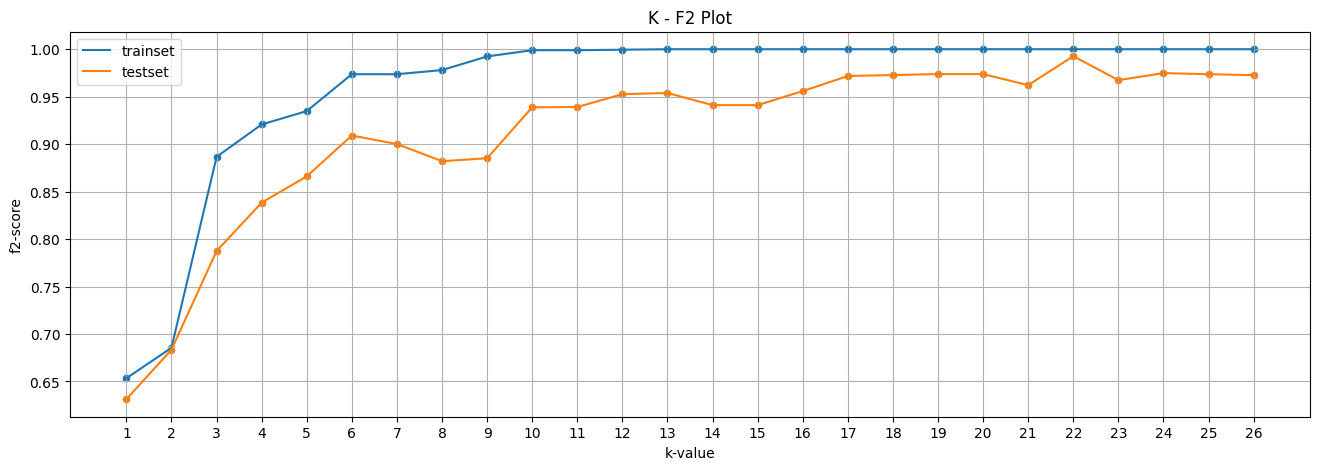

In [101]:
# visualisation
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title('K - F2 Plot')

# train
sns.lineplot(data=df_ktest, x='k-value', y='f2-train', label='trainset')
sns.scatterplot(data=df_ktest, x='k-value', y='f2-train')

# test
sns.lineplot(data=df_ktest, x='k-value', y='f2-test', label='testset')
sns.scatterplot(data=df_ktest, x='k-value', y='f2-test')

plt.xticks(list_kval)
plt.ylabel('f2-score');

Ada peningkatan signifikan dari performa model ketika k-value = 22. <br>
Tidak ada perbedaan jauh dari f2-score trainset dan testset ketika k-value = 22. <br>
Artinya, ada beberapa (4) feature yang boleh dihapus untuk meningkatkan performa model kita.<br>
(Ada total 26 features di model kita setelah preprocessing.)

In [102]:
# updated model
model_feat = imb_Pipeline([
    ('prep', transformer),
    ('resampler', over),
    ('select', SelectKBest(k=22)),
    ('model', xgb_tuned)
    ])
model_feat.fit(x_train, y_train)

# scores
scores = model_feat.named_steps['select'].scores_
selected_features = model_feat.named_steps['select'].get_support()
df_scores = pd.DataFrame({
    'feature':col_names,
    'score':scores,
    'is_selected':selected_features
}).sort_values('score', ascending=False)

display(df_scores.head(), df_scores.tail())

,feature,score,is_selected
13,robust__Tenure,2245.704025,True
25,remainder__Complain,820.088507,True
22,robust__CashbackAmount,432.702720,True
6,onehot__MaritalStatus_Single,375.620518,True
12,binary__PreferedOrderCat_2,367.625961,True


,feature,score,is_selected
15,robust__HourSpendOnApp,9.247217,True
8,binary__PreferredPaymentMode_1,5.780377,False
9,binary__PreferredPaymentMode_2,1.448118,False
18,robust__OrderAmountHikeFromlastYear,1.373223,False
19,robust__CouponUsed,0.002377,False


Berdasarkan feature selection dari SelectKBest, beberapa insight bisa didapatkan:
- Feature yang paling berpengaruh adalah:
    1. Tenure
    2. Complain
    3. CashbackAmount
    4. MaritalStatus
    5. PreferedOrderCat
<br><br>
- Feature yang paling tidak berpengaruh dan boleh diignore untuk modeling adalah:
    1. CouponUsed
    2. OrderAmountHikeFromLastYear
    3. PreferredPaymentMode

**Confusion Matrix**

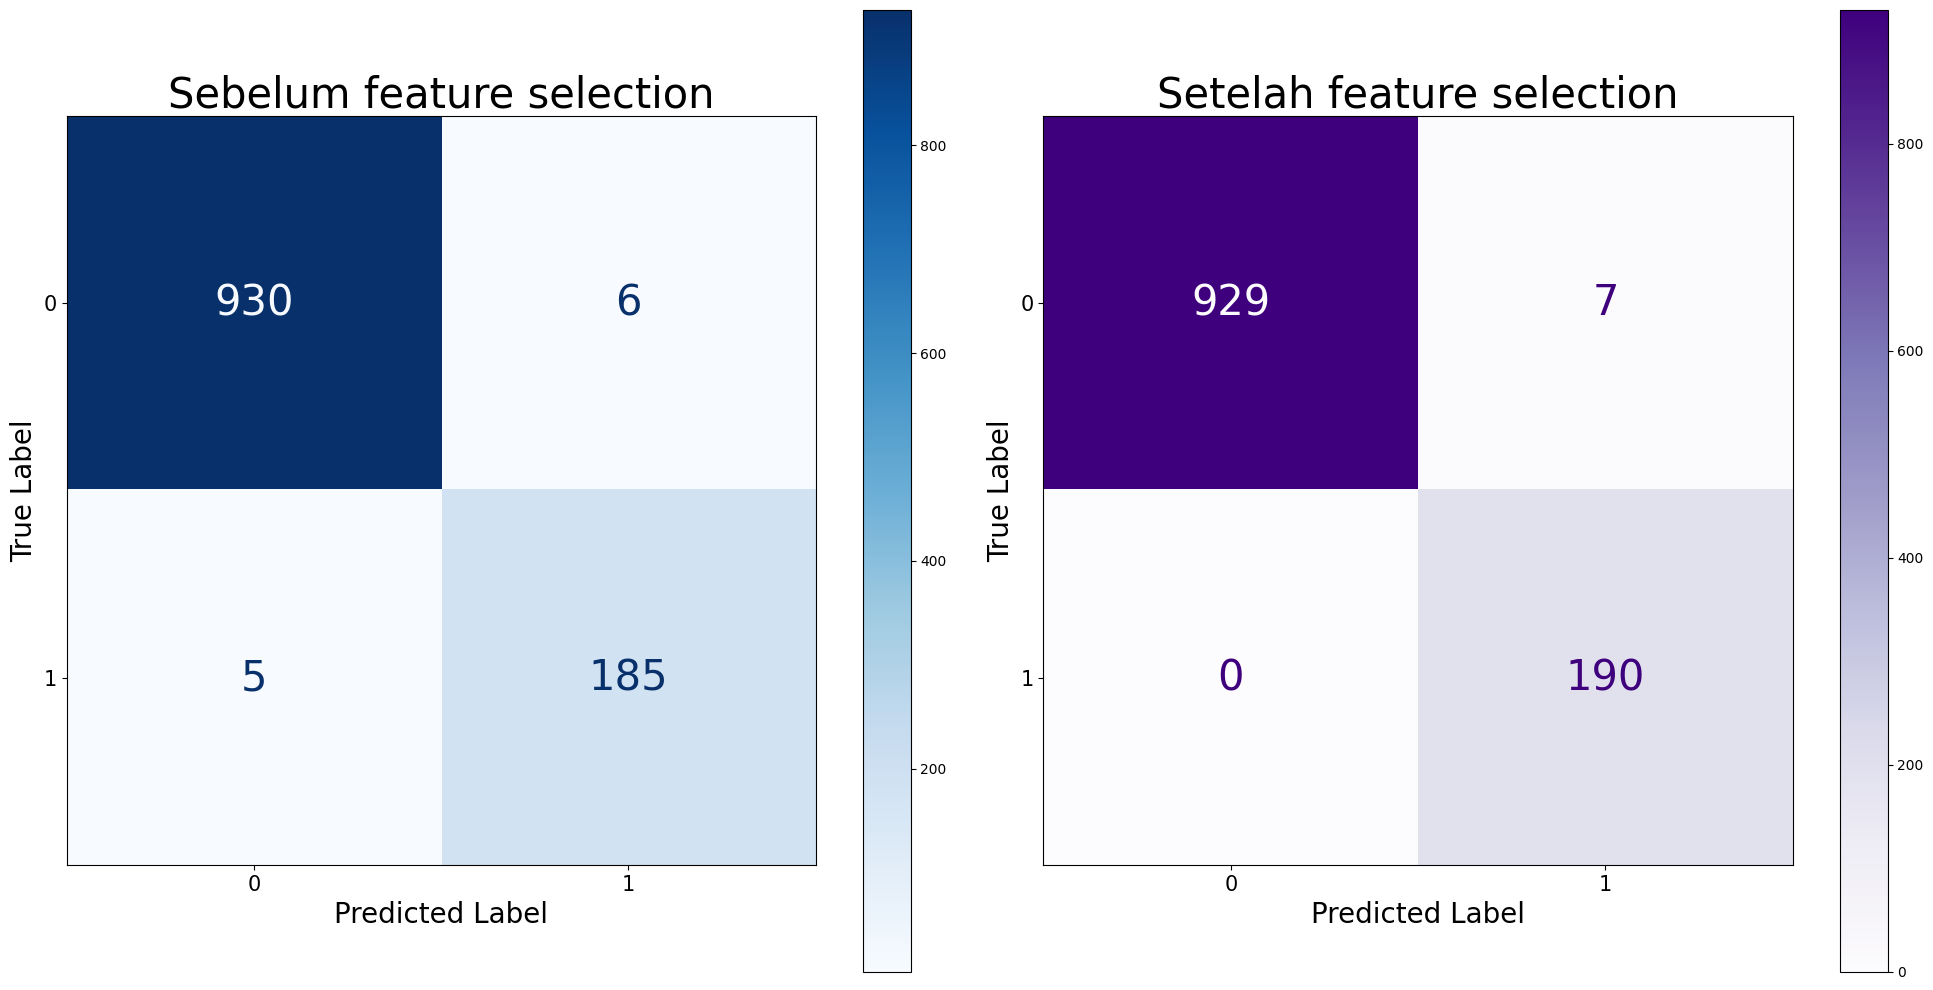

In [103]:
# updated model
model_feat = imb_Pipeline([
    ('prep', transformer),
    ('resampler', over),
    ('select', SelectKBest(k=22)),
    ('model', xgb_tuned)
    ])
model_feat.fit(x_train, y_train)

# predicting
y_pred_feat = model_feat.predict(x_test)

# Subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Sebelum resampling
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_over))
disp1.plot(ax=axes[0], cmap='Blues', text_kw={'size': 30})
axes[0].set_xlabel('Predicted Label', fontsize=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].set_ylabel('True Label', fontsize=20)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_title('Sebelum feature selection', fontsize=30)

# Setelah resampling
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_feat))
disp2.plot(ax=axes[1], cmap='Purples', text_kw={'size': 30})
axes[1].set_xlabel('Predicted Label', fontsize=20)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_ylabel('True Label', fontsize=20)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].set_title('Setelah feature selection', fontsize=30)
plt.tight_layout() 
plt.show()

Setelah feature selection, ada beberapa hal yang kita bisa lihat:
1. **f2-score naik secara signifikan, dari 0.9726 ke 0.9926**
2. **ada penurunan drastis dari False Negative (FN) ke True Positive (TP)**, dari 5 FN ke 0 FN.
3. **ada penurunan sedikit dari True Negative (TN) ke False Positive (FP)**, dari 6 FP ke 7 FP.
<br>

Lagi, kita sudah tentukan di atas kalau pengaruh dari FN jauh lebih besar daripada pengaruh dari FP.<br>
Jadi, bisa dibilang kalau model kita lebih akurat setelah feature selection.

### **8. Check for Overfitting**
Kita sudah mendapatkan final model kita. Sebelum digunakan, kita akan mengecek apakah model kita mengalami *overfitting* atau tidak.

# **Kesimpulan**

Dari hasil analisis data yang telah dilakukan, kita dapat membuat kesimpulan terkait faktor- faktor apa saja yang mempengaruhi keputusan pelanggan untuk meninggalkan platform E-commerce (Churn):
1. Waktu pelanggan bergabung ke dalam E-Commerce (Tenure) mempengaruhi pelanggan akan Churn/ Tidak. Pelanggan yang bergabung selama 0-21 bulan cenderung untuk Churn. Pelanggan yang paling signifikan untuk Churn adalah pelanggan yang baru bergabung 0-1 bulan, dengan persentase Churn sebesar 51-54%.
2. Jarak antara Gudang ke rumah pelanggan (WarehouseToHome) mempengaruhi pelanggan akan Churn/ Tidak. Pelanggan yang memiliki jarak rumah dengan gudang mencapai >= 21 km lebih cenderung untuk Churn, dengan persentase 20% - 21%. Pelanggan yang hanya memiliki jarak dari rumah ke Gudang <= 10 km memiliki persentase Churn yang rendah, sebesar 15%. 
3. Jumlah device yang didaftarkan ke platform E-Commerce (NumberofDevice) mempengaruhi pelanggan akan Churn/ Tidak. Pelanggan yang mendaftarkan banyak device lebih banyak yang Churn dibandingkan dengan yang sedikit.
4. Jumlah alamat yang didaftarkan ke platform E-Commerce (NumberofAdress) mempengaruhi pelanggan akan Chrun/Tidak. Namun, grafik menunjukkan data yang fluktuatif. Sehingga semua pelanggan, baik yang mendaftarkan banyak alamat maupun sedikit tetap berpotensi untuk Churn. Akantetapi, jumlah alamat yang didaftarkan memiliki tingkat Churn yang berbeda-beda.
5. Waktu/ tanggak pelanggan melakukan pesanan (DaySinceLastOrder) mempengaruhi pelanggan akan Churn/Tidak. Pelanggan yang melakukan order di akhir bulan cenderung untuk Churn, dibandingkan dengan awal bulan.
6. Jumlah oder/ pesanan (OrderCount) mempengaruhi pelanggan akan Churn/Tidak. Grafik yang ditunjukkan fluktuatif, sehingga pelanggan yang melakukan order dengan jumlah kecil belum tentu akan Churn, begitu juga sebaliknya.
7. Jumlah Cashback yang diterima (CashbackAmmount) mempengaruhi pelanggan akan Churn/ Tidak. Pelanggan yang mendapatkan Cashback sedikit cenderung Churn, dibandingkan dengan yang mendapatkan banyak Cashback.
8. Seluruh fitur kategorikal data kita (PreferredLoginDevice, PrefferedPaymentMode, Gender, PreferedOrderCat, MaritalStatus, Complain, CityTier, dan StatisfactionScore) memiliki keterikatan dengan Churn/ Tidak.
	- Pelanggan yang menggunakan Computer lebih banyak Churn dibandingkan yang menggunakan Mobile Phone
	- Metode pembayaran COD memiliki nilai Churn yang paling tinggi dibandingkan dengan metode pembayaran lainnya.
	- Pelanggan laki-laki lebih banyak Chrun dibandingkan pelanggan perempuan
	- Pelanggan yang membeli produk Mobile Phone merupakan pelanggan yang paling banyak Churn dibandingkan dengan produk lainnya
	- Pelanggan dengan status Single merupakan pelanggan yang paling banyak Churn
	- Pelanggan yang pernah mengajukan Complain lebih cenderung Churn dibanding yang tidak mengajukan Complain
	- Pelanggan yang berada di CityTier 3 paling banyak melakukan Churn dibanding CityTier lainnya.
	- Pelanggan yang memberikan nilai 5 pada SatisfactionScroe justru lebih banyak Churn dibandingkan dengan pelanggan yang memberikan nilai < 5

# **Rekomendasi**

Terdapat beberapa rekomendasi terhada beberapa rekomendasi yang dapat dilakukan oleh perusahaan E-commerce berdasarkan dari analisa data:
1. **Menerapkan program Onboarding:**<br>
    Program onboarding adalah program yang dilakukan oleh perusahaan E-Commerce untuk membantu pelanggan baru dalam beradaptasi di aplikasi ini. Hal yang dapat dilakukan adalah menyediakan panduan atau langkah yang jelas dalam menggunakan platform E-Commerce ini, kemudian demo atau tutorial interaktif seperti video yang dapat memandu pelanggan dalam menggunakan berbagai fitur. Perusahaan juga dapat memberikan Diskon khusus untuk pelanggan baru, seperti diskon untuk pembelian pertama, kupon cashback yang nominalnya lumayan besar, dsb. Hal ini dapat dilakukan perusahaan untuk meningkatkan ketertarikan pelanggan baru, khususnya yang baru bergabung selama 0-21 bulan agar mereka tidak Churn.
    
2. **Mengoptimalisasi Pengiriman**:<br>
    Perusahaan dapat mengoptimalkan pengiriman, khususnya untuk pelanggan dengan jarak Gudang ke Rumah >= 21 dengan menyediakan opsi pengiringan cepat. Selain itu perusahaan juga dapat memberikan kupon diskon potongan ongkos kirim atau gratis ongkos kirim. Opsi pembayaran COD juga harus lebih diperhatikan oleh perusahaan ini, seperti menyediakan layanan barang boleh dibuka sebelum dibayar untuk menghindari penipuan. Hal ini dapat menjadi langkah pencegahan agar pelanggan tidak Churn.

3. **Pengelolaan Multi-Device**:<br>
    Perusahaan dapat mengupayakan memberikan pengalaman yang konsisten kepada pelanggan yang menggunakan lebih dari satu device untuk mengakses E-Commerce ini. Terdapat beberapa hal yang perlu diperhatikan :
    - Pastikan bahwa (UI/UX) dan fungsionalitas platform disemua device sama. Hal ini termasuk tata letak halaman dan fitur-fitur yang tersedia. Sehingga pengguna lebih merasa nyaman dan familiar meskipun menggunakan banyak device.
    - Perusahaan juga harus memfasilitasi login yang mudah disemua device. Contohnya dapat menyediakan fungsi login otomatis atau integrasi dengan sistem otentifikasi seperti google, facebook, AppleID, dsb. 
    - Pastikan E-commerce ini juga dirancang responsif diseluruh device, baik dalam IOS, Android, mapun Windows(Komputer)<br><br>


4. **Promosi & Cashback yang Tepat Sasaran**:<br>
    Perusahaan dapat memberikan diskon yang sesuai dengan preferensi pelanggan, terutama untuk pelanggan yang melakukan order di akhir bulan atau yang memiliki jumlah order yang rendah. Perusahaan juga dapat megoptimalisasi program cashback kepada pelanggan yang memiliki potensi Churn, khususnya yang menerima cashback dalam jumlah yang sedikit. Selain itu perusahaan juga dapat lebih gencar melakukan kampaye promosi dilokasi CityTier 3, agar perusahaan dapat bersaing dengan platform E-Commerce lainnya. Perusahaan juga dapat memberikan promosi atau cashback khusus kepada pelanggan dengan status Single, agar pelanggan tersebut lebih memilih untuk berbelanja di platform ini dibandingkan dengan yang lainnya.

5. **Penanganan Complain yang Efektif**<br>
     Perusahaan dapat meningkatan penanganan complain yang baik dengan melakukan evaluasi berkala apakah sudah memuaskan pelanggan atau belum. Hal ini berguna untuk mengurangi tingkat churn pada pelanggan yang pernah mengajukan complain. Selain itu, perusahaan juga dapat memberikan kompensasi seperti diskon untuk pembelian selanjutnya agar pelanggan tetap stay pada E-Commerce ini.

6. **Strategi Retensi Pelanggan**: <br>
    Perhatian perusahaan tidak hanya dilakukan kepada pelanggan yang Churn, pelanggan yang setia juga harus diperhatikan. Perusahaan dapat mengimplementasikan strategi retensi pelanggan yang mencakup pemberian reward, program loyalitas, atau penawaran khusus untuk menghargai pelanggan setia dan mendorong mereka untuk tetap berbelanja.